In [136]:
import os
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from catboost import CatBoostRegressor
#from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import seaborn as sns
from scipy import stats
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
%matplotlib inline

pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 200)
#things we should do:
#Export data analysis
#accurate preprosessing, remove outliers
#strong model
#hyperparamter tuning and validation as times series validation is key thing here
#stacking, to merge diffrent strong models
#result analysis, what are the most important featurs
#lectures will give insights of how to these things
#find out what featurs that 

#tips fra gutta på sal<3
#bruke H20 AutoML
#bruke gjennomsnitt power output over en time istedenfor hver variabel



In [137]:
def list_directory_tree_with_os_walk(starting_directory):
    for root, directories, files in os.walk(starting_directory):
        print(f"Directory: {root}")
        for file in files:
            print(f"  File: {file}")

list_directory_tree_with_os_walk('.')

Directory: .
  File: .DS_Store
  File: catBoost.ipynb
  File: feature_selection_report.txt
  File: final_model_for_location_A.pkl
  File: final_model_for_location_B.pkl
  File: final_model_for_location_C.pkl
  File: Location_A_comparisons.png
  File: Location_B_comparisons.png
  File: Location_C_comparisons.png
  File: logs.log
  File: my_first_submission.csv
  File: predictions_run13.csv
  File: predictions_run14.csv
  File: predictions_run16.csv
  File: predictions_run17.csv
  File: predictions_run18.csv
  File: Readme.md
  File: read_files.ipynb
  File: run_counter.txt
  File: sample_submission.csv
  File: test.csv
Directory: .\A
  File: train_targets.parquet
  File: X_test_estimated.parquet
  File: X_train_estimated.parquet
  File: X_train_observed.parquet
Directory: .\B
  File: train_targets.parquet
  File: X_test_estimated.parquet
  File: X_train_estimated.parquet
  File: X_train_observed.parquet
Directory: .\C
  File: train_targets.parquet
  File: X_test_estimated.parquet
  File

In [138]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your data
train_a = pd.read_parquet('A/train_targets.parquet')
train_b = pd.read_parquet('B/train_targets.parquet')
train_c = pd.read_parquet('C/train_targets.parquet')
'''
mean_a = train_a['pv_measurement'].mean()
mean_b = train_b['pv_measurement'].mean()
mean_c = train_c['pv_measurement'].mean()

train_a['pv_measurement'] /= mean_a
train_b['pv_measurement'] /= mean_b
train_c['pv_measurement'] /= mean_c'''

'''epsilon = 1e-10
print(train_a.dtypes)
# Add the constant to all values in the DataFrame and then apply the square root.
train_a['pv_measurement'] = np.sqrt(train_a['pv_measurement'] + epsilon)'''
'''print(len(train_a)+len(train_b)+len(train_c))
#interpolation and moving avarage, test this again with new model
# Set the index to the time column
train_a.set_index('time', inplace=True)
train_b.set_index('time', inplace=True)
train_c.set_index('time', inplace=True)

# Replace zero values with NaN
train_a.replace(0, np.nan, inplace=True)
train_b.replace(0, np.nan, inplace=True)
train_c.replace(0, np.nan, inplace=True)

# Perform time-based interpolation
train_a.interpolate(method='time', inplace=True)
train_b.interpolate(method='time', inplace=True)
train_c.interpolate(method='time', inplace=True)

# Define the window size for the moving average
window_size = 3

# Compute the moving average
train_a_smoothed = train_a.rolling(window=window_size).mean()
train_b_smoothed = train_b.rolling(window=window_size).mean()
train_c_smoothed = train_c.rolling(window=window_size).mean()

# Assuming all datasets have the same features
features = [col for col in train_a.columns]

for feature_name in features:
    fig, axs = plt.subplots(3, 1, figsize=(20, 10), sharex=True)
    
    # Plotting for dataset A
    train_a[feature_name].plot(ax=axs[0], title=f'Train A - {feature_name}')
    train_a_smoothed[feature_name].plot(ax=axs[0], linestyle='--', label=f'{window_size}-Day Moving Average')
    
    # Plotting for dataset B
    train_b[feature_name].plot(ax=axs[1], title=f'Train B - {feature_name}')
    train_b_smoothed[feature_name].plot(ax=axs[1], linestyle='--', label=f'{window_size}-Day Moving Average')
    
    # Plotting for dataset C
    train_c[feature_name].plot(ax=axs[2], title=f'Train C - {feature_name}')
    train_c_smoothed[feature_name].plot(ax=axs[2], linestyle='--', label=f'{window_size}-Day Moving Average')
    
    # Adding legends
    axs[0].legend()
    axs[1].legend()
    axs[2].legend()
    
    plt.tight_layout()
    plt.show()

# Replace zero values with NaN
train_a_smoothed.replace(np.nan,0, inplace=True)
train_b_smoothed.replace(np.nan,0, inplace=True)
train_c_smoothed.replace(np.nan,0, inplace=True)

train_a.replace( np.nan,0, inplace=True)
train_b.replace(np.nan,0, inplace=True)
train_c.replace( np.nan,0, inplace=True)'''

"print(len(train_a)+len(train_b)+len(train_c))\n#interpolation and moving avarage, test this again with new model\n# Set the index to the time column\ntrain_a.set_index('time', inplace=True)\ntrain_b.set_index('time', inplace=True)\ntrain_c.set_index('time', inplace=True)\n\n# Replace zero values with NaN\ntrain_a.replace(0, np.nan, inplace=True)\ntrain_b.replace(0, np.nan, inplace=True)\ntrain_c.replace(0, np.nan, inplace=True)\n\n# Perform time-based interpolation\ntrain_a.interpolate(method='time', inplace=True)\ntrain_b.interpolate(method='time', inplace=True)\ntrain_c.interpolate(method='time', inplace=True)\n\n# Define the window size for the moving average\nwindow_size = 3\n\n# Compute the moving average\ntrain_a_smoothed = train_a.rolling(window=window_size).mean()\ntrain_b_smoothed = train_b.rolling(window=window_size).mean()\ntrain_c_smoothed = train_c.rolling(window=window_size).mean()\n\n# Assuming all datasets have the same features\nfeatures = [col for col in train_a.colu

In [139]:
X_train_estimated_a = pd.read_parquet('A/X_train_estimated.parquet')
X_train_estimated_b = pd.read_parquet('B/X_train_estimated.parquet')
X_train_estimated_c = pd.read_parquet('C/X_train_estimated.parquet')
#print(X_train_estimated_a.dtypes)
#print(X_train_estimated_a.nunique())
print(X_train_estimated_a['date_calc'])
'''okey, can you make a code in python that test Feature Transformation: Try transforming these features (e.g., logarithmic, polynomial transformations) to see if they can be made more predictive.
Feature Interaction: Create interaction terms between features. Sometimes, the combination of two features can be more predictive than each feature on its own. on our data, do some diffrent transformations and try to feature interact all possibilities and give me back the best feature eng'''

0       2022-10-27 07:00:18
1       2022-10-27 07:00:18
2       2022-10-27 07:00:18
3       2022-10-27 07:00:18
4       2022-10-27 07:00:18
                ...        
17571   2023-04-29 07:00:05
17572   2023-04-29 07:00:05
17573   2023-04-29 07:00:05
17574   2023-04-29 07:00:05
17575   2023-04-29 07:00:05
Name: date_calc, Length: 17576, dtype: datetime64[ns]


'okey, can you make a code in python that test Feature Transformation: Try transforming these features (e.g., logarithmic, polynomial transformations) to see if they can be made more predictive.\nFeature Interaction: Create interaction terms between features. Sometimes, the combination of two features can be more predictive than each feature on its own. on our data, do some diffrent transformations and try to feature interact all possibilities and give me back the best feature eng'

In [140]:
X_train_observed_a = pd.read_parquet('A/X_train_observed.parquet')
X_train_observed_b = pd.read_parquet('B/X_train_observed.parquet')
X_train_observed_c = pd.read_parquet('C/X_train_observed.parquet')
#print(X_train_estimated_a.dtypes)
#sjekker antall variabler som er nan
'''nan_counts_a = X_train_observed_a.isna().sum()
nan_counts_b = X_train_observed_b.isna().sum()
nan_counts_c = X_train_observed_c.isna().sum()

print("NaN counts for X_test_a:\n", nan_counts_a)

print("\nNaN counts for X_test_b:\n", nan_counts_b)
print("\nNaN counts for X_test_c:\n", nan_counts_c)'''

'nan_counts_a = X_train_observed_a.isna().sum()\nnan_counts_b = X_train_observed_b.isna().sum()\nnan_counts_c = X_train_observed_c.isna().sum()\n\nprint("NaN counts for X_test_a:\n", nan_counts_a)\n\nprint("\nNaN counts for X_test_b:\n", nan_counts_b)\nprint("\nNaN counts for X_test_c:\n", nan_counts_c)'

In [141]:
X_test_estimated_a = pd.read_parquet('A/X_test_estimated.parquet')
X_test_estimated_b = pd.read_parquet('B/X_test_estimated.parquet')
X_test_estimated_c = pd.read_parquet('C/X_test_estimated.parquet')
'''nan_counts_a = X_test_estimated_a.isna().sum()
nan_counts_b = X_test_estimated_b.isna().sum()
nan_counts_c = X_test_estimated_c.isna().sum()

print("NaN counts for X_test_a:\n", nan_counts_a)

print("\nNaN counts for X_test_b:\n", nan_counts_b)
print("\nNaN counts for X_test_c:\n", nan_counts_c)'''

'nan_counts_a = X_test_estimated_a.isna().sum()\nnan_counts_b = X_test_estimated_b.isna().sum()\nnan_counts_c = X_test_estimated_c.isna().sum()\n\nprint("NaN counts for X_test_a:\n", nan_counts_a)\n\nprint("\nNaN counts for X_test_b:\n", nan_counts_b)\nprint("\nNaN counts for X_test_c:\n", nan_counts_c)'

In [142]:
#Merging estimated and observed data with the power output, but we might need to investigate if there is some differece in observed weather and weather forcast

# Add a new column to indicate whether the data is observed or estimated
'''X_train_observed_a['source'] = 'observed'
X_train_estimated_a['source'] = 'estimated'''

# Calculate the time lag (in days) between the forecast date and the calculation date
#X_train_estimated_a['forecast_lag'] = (X_train_estimated_a['date_forecast'] - X_train_estimated_a['date_calc']).dt.days
#X_train_observed_a['forecast_lag'] = np.nan
# Combine estimated and observed data for location A
X_train_a = pd.concat([X_train_estimated_a, X_train_observed_a])

# Merge features and target data for location A
merged_data_a = pd.merge(X_train_a, train_a, left_on='date_forecast', right_on='time')
#merged_data_a = merged_data_a.dropna(subset=['pv_measurement'])
# Add a new column to indicate whether the data is observed or estimated
'''X_train_observed_b['source'] = 'observed'
X_train_estimated_b['source'] = 'estimated'''
#print(X_train_estimated_a['forecast_lag'])
# Combine estimated and observed data for location A
X_train_b = pd.concat([X_train_estimated_b, X_train_observed_b])

# Merge features and target data for location A
merged_data_b = pd.merge(X_train_b, train_b, left_on='date_forecast', right_on='time')
#merged_data_b = merged_data_b.dropna(subset=['pv_measurement'])
# Now, calculate the correlation matrix
#correlation_matrix_b = merged_data_b.corr()

# You might want to focus on the correlations with the target variable
#correlations_with_target_b = correlation_matrix_b['pv_measurement'].sort_values(ascending=False)
#print(correlations_with_target_b)
# Add a new column to indicate whether the data is observed or estimated
'''X_train_observed_c['source'] = 'observed'
X_train_estimated_c['source'] = 'estimated'''
# Combine estimated and observed data for location A
X_train_c = pd.concat([X_train_estimated_c, X_train_observed_c])

# Merge features and target data for location A
merged_data_c = pd.merge(X_train_c, train_c, left_on='date_forecast', right_on='time')
print(merged_data_c.shape)
#merged_data_c = merged_data_c.dropna(subset=['pv_measurement'])
print(merged_data_c.shape)
# Add a new column to indicate whether the data is observed or estimated
'''X_test_estimated_a['source'] = 'observed'
X_test_estimated_b['source'] = 'observed'
X_test_estimated_c['source'] = 'observed'''
#print(merged_data_a.dtypes)
merg= merged_data_c.isna().sum()
print("NaN counts for X_test_a:\n", merg)

(32130, 49)
(32130, 49)
NaN counts for X_test_a:
 date_calc                         29200
date_forecast                         0
absolute_humidity_2m:gm3              0
air_density_2m:kgm3                   0
ceiling_height_agl:m               6813
clear_sky_energy_1h:J                 0
clear_sky_rad:W                       0
cloud_base_agl:m                   3114
dew_or_rime:idx                       0
dew_point_2m:K                        0
diffuse_rad:W                         0
diffuse_rad_1h:J                      0
direct_rad:W                          0
direct_rad_1h:J                       0
effective_cloud_cover:p               0
elevation:m                           0
fresh_snow_12h:cm                     0
fresh_snow_1h:cm                      0
fresh_snow_24h:cm                     0
fresh_snow_3h:cm                      0
fresh_snow_6h:cm                      0
is_day:idx                            0
is_in_shadow:idx                      0
msl_pressure:hPa              

In [143]:
'''#Here we are calculating the lineral correlation of each feature to the power output
# Now, calculate the correlation matrix
correlation_matrix_a = merged_data_a.corr()

# You might want to focus on the correlations with the target variable
correlations_with_target_a = correlation_matrix_a['pv_measurement'].sort_values(ascending=False)
#print(correlations_with_target_a)

# Now, calculate the correlation matrix
correlation_matrix_b = merged_data_b.corr()

# You might want to focus on the correlations with the target variable
correlations_with_target_b = correlation_matrix_b['pv_measurement'].sort_values(ascending=False)
#print(correlations_with_target_b)

# Now, calculate the correlation matrix
correlation_matrix_c = merged_data_c.corr()

# You might want to focus on the correlations with the target variable
correlations_with_target_c = correlation_matrix_c['pv_measurement'].sort_values(ascending=False)
#print(correlations_with_target_c)


# Create a DataFrame to hold the correlation values
correlation_comparison = pd.DataFrame({
    'Feature': correlations_with_target_a.index,
    'Location_A': correlations_with_target_a.values,
    'Location_B': correlations_with_target_b.reindex(correlations_with_target_a.index).values,
    'Location_C': correlations_with_target_c.reindex(correlations_with_target_a.index).values
})

# Calculate the absolute difference in correlation values across locations
correlation_comparison['Max_Diff'] = correlation_comparison.apply(
    lambda row: max(row['Location_A'], row['Location_B'], row['Location_C']) - 
                min(row['Location_A'], row['Location_B'], row['Location_C']), axis=1)


# Sort the DataFrame based on the difference in correlation values
correlation_comparison = correlation_comparison.sort_values(by='Max_Diff', ascending=False)
# Print the DataFrame
print(correlation_comparison)
'''

"#Here we are calculating the lineral correlation of each feature to the power output\n# Now, calculate the correlation matrix\ncorrelation_matrix_a = merged_data_a.corr()\n\n# You might want to focus on the correlations with the target variable\ncorrelations_with_target_a = correlation_matrix_a['pv_measurement'].sort_values(ascending=False)\n#print(correlations_with_target_a)\n\n# Now, calculate the correlation matrix\ncorrelation_matrix_b = merged_data_b.corr()\n\n# You might want to focus on the correlations with the target variable\ncorrelations_with_target_b = correlation_matrix_b['pv_measurement'].sort_values(ascending=False)\n#print(correlations_with_target_b)\n\n# Now, calculate the correlation matrix\ncorrelation_matrix_c = merged_data_c.corr()\n\n# You might want to focus on the correlations with the target variable\ncorrelations_with_target_c = correlation_matrix_c['pv_measurement'].sort_values(ascending=False)\n#print(correlations_with_target_c)\n\n\n# Create a DataFrame to

In [144]:
# Plotting a single feature
'''fig, axs = plt.subplots(3, 1, figsize=(20, 10), sharex=True)
feature_name = 'absolute_humidity_2m:gm3'
X_train_observed_a[['date_forecast', feature_name]].set_index('date_forecast').plot(ax=axs[0], title='Train/Test A', color='red')
X_train_estimated_a[['date_forecast', feature_name]].set_index('date_forecast').plot(ax=axs[0], title='Train/Test A', color='blue')
X_test_estimated_a[['date_forecast', feature_name]].set_index('date_forecast').plot(ax=axs[0], title='Train/Test  A', color='green')

X_train_observed_b[['date_forecast', feature_name]].set_index('date_forecast').plot(ax=axs[1], title='Train/Test  B', color='red')
X_train_estimated_b[['date_forecast', feature_name]].set_index('date_forecast').plot(ax=axs[1], title='Train/Test  B', color='blue')
X_test_estimated_b[['date_forecast', feature_name]].set_index('date_forecast').plot(ax=axs[1], title='Train/Test  B', color='green')

X_train_observed_c[['date_forecast', feature_name]].set_index('date_forecast').plot(ax=axs[2], title='Train/Test  C', color='red')
X_train_estimated_c[['date_forecast', feature_name]].set_index('date_forecast').plot(ax=axs[2], title='Train/Test  C', color='blue')
X_test_estimated_c[['date_forecast', feature_name]].set_index('date_forecast').plot(ax=axs[2], title='Train/Test  C', color='green')'''

"fig, axs = plt.subplots(3, 1, figsize=(20, 10), sharex=True)\nfeature_name = 'absolute_humidity_2m:gm3'\nX_train_observed_a[['date_forecast', feature_name]].set_index('date_forecast').plot(ax=axs[0], title='Train/Test A', color='red')\nX_train_estimated_a[['date_forecast', feature_name]].set_index('date_forecast').plot(ax=axs[0], title='Train/Test A', color='blue')\nX_test_estimated_a[['date_forecast', feature_name]].set_index('date_forecast').plot(ax=axs[0], title='Train/Test  A', color='green')\n\nX_train_observed_b[['date_forecast', feature_name]].set_index('date_forecast').plot(ax=axs[1], title='Train/Test  B', color='red')\nX_train_estimated_b[['date_forecast', feature_name]].set_index('date_forecast').plot(ax=axs[1], title='Train/Test  B', color='blue')\nX_test_estimated_b[['date_forecast', feature_name]].set_index('date_forecast').plot(ax=axs[1], title='Train/Test  B', color='green')\n\nX_train_observed_c[['date_forecast', feature_name]].set_index('date_forecast').plot(ax=axs[2

In [145]:
test = pd.read_csv('test.csv')
test


,id,time,prediction,location
0,0,2023-05-01 00:00:00,0,A
1,1,2023-05-01 01:00:00,0,A
2,2,2023-05-01 02:00:00,0,A
3,3,2023-05-01 03:00:00,0,A
4,4,2023-05-01 04:00:00,0,A
...,...,...,...,...
2155,2155,2023-07-03 19:00:00,0,C
2156,2156,2023-07-03 20:00:00,0,C
2157,2157,2023-07-03 21:00:00,0,C
2158,2158,2023-07-03 22:00:00,0,C


In [146]:
sample_submission = pd.read_csv('sample_submission.csv')
sample_submission

,id,prediction
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0
...,...,...
2155,2155,0
2156,2156,0
2157,2157,0
2158,2158,0


In [147]:
# Example, let the predictions be random values
test['prediction'] = np.random.rand(len(test))
print(test)
sample_submission = sample_submission[['id']].merge(test[['id', 'prediction']], on='id', how='left')
sample_submission.to_csv('my_first_submission.csv', index=False)

        id                 time  prediction location
0        0  2023-05-01 00:00:00    0.326793        A
1        1  2023-05-01 01:00:00    0.989941        A
2        2  2023-05-01 02:00:00    0.409232        A
3        3  2023-05-01 03:00:00    0.755466        A
4        4  2023-05-01 04:00:00    0.082742        A
...    ...                  ...         ...      ...
2155  2155  2023-07-03 19:00:00    0.668508        C
2156  2156  2023-07-03 20:00:00    0.093732        C
2157  2157  2023-07-03 21:00:00    0.013452        C
2158  2158  2023-07-03 22:00:00    0.939922        C
2159  2159  2023-07-03 23:00:00    0.539512        C

[2160 rows x 4 columns]


In [148]:
'''def rmsle(y_true, y_pred):
    """
    Computes the Root Mean Squared Logarithmic Error 
    
    Args:
        y_true (np.array): n-dimensional vector of ground-truth values 
        y_pred (np.array): n-dimensional vecotr of predicted values 
    
    Returns:
        A scalar float with the rmsle value 
    
    Note: You can alternatively use sklearn and just do: 
        sklearn.metrics.mean_squared_log_error(y_true, y_pred) ** 0.5
    """
    assert (y_true >= 0).all(), 'Received negative y_true values'
    assert (y_pred >= 0).all(), 'Received negative y_pred values'
    assert y_true.shape == y_pred.shape, 'y_true and y_pred have different shapes'
    y_true_log1p = np.log1p(y_true)  # log(1 + y_true)
    y_pred_log1p = np.log1p(y_pred)  # log(1 + y_pred)
    return np.sqrt(np.mean(np.square(y_pred_log1p - y_true_log1p)))'''

'def rmsle(y_true, y_pred):\n    """\n    Computes the Root Mean Squared Logarithmic Error \n    \n    Args:\n        y_true (np.array): n-dimensional vector of ground-truth values \n        y_pred (np.array): n-dimensional vecotr of predicted values \n    \n    Returns:\n        A scalar float with the rmsle value \n    \n    Note: You can alternatively use sklearn and just do: \n        sklearn.metrics.mean_squared_log_error(y_true, y_pred) ** 0.5\n    """\n    assert (y_true >= 0).all(), \'Received negative y_true values\'\n    assert (y_pred >= 0).all(), \'Received negative y_pred values\'\n    assert y_true.shape == y_pred.shape, \'y_true and y_pred have different shapes\'\n    y_true_log1p = np.log1p(y_true)  # log(1 + y_true)\n    y_pred_log1p = np.log1p(y_pred)  # log(1 + y_pred)\n    return np.sqrt(np.mean(np.square(y_pred_log1p - y_true_log1p)))'

In [149]:
#Managing the data

'''X_train_a = pd.concat([X_train_observed_a, X_train_estimated_a])
X_train_b = pd.concat([X_train_observed_b, X_train_estimated_b])
X_train_c = pd.concat([X_train_observed_c, X_train_estimated_c])
print(X_train_a['snow_density:kgm3'])'''
# Split the merged data into features (X) and target (y)
'''merged_data = pd.merge(X_train_a, train_a, left_on='date_forecast', right_on='time')
merged_data_b = pd.merge(X_train_b, train_b, left_on='date_forecast', right_on='time')
merged_data_c = pd.merge(X_train_c, train_c, left_on='date_forecast', right_on='time')'''

#Adding hour, day month and year as parameters in the model from dataforecast
merged_data_a['hour'] = merged_data_a['date_forecast'].dt.hour
merged_data_a['day'] = merged_data_a['date_forecast'].dt.day
merged_data_a['month'] = merged_data_a['date_forecast'].dt.month
#merged_data_a['year'] = merged_data_a['date_forecast'].dt.year

merged_data_b['hour'] = merged_data_b['date_forecast'].dt.hour
merged_data_b['day'] = merged_data_b['date_forecast'].dt.day
merged_data_b['month'] = merged_data_b['date_forecast'].dt.month
#merged_data_b['year'] = merged_data_b['date_forecast'].dt.year

merged_data_c['hour'] = merged_data_c['date_forecast'].dt.hour
merged_data_c['day'] = merged_data_c['date_forecast'].dt.day
merged_data_c['month'] = merged_data_c['date_forecast'].dt.month
#merged_data_c['year'] = merged_data_c['date_forecast'].dt.year

#Splitting into X and Y values
y = merged_data_a['pv_measurement']
X = merged_data_a.drop(columns=['pv_measurement'])#, 'date_forecast', 'date_calc', 'time'])

y_b = merged_data_b['pv_measurement']
X_b = merged_data_b.drop(columns=['pv_measurement'])#, 'date_forecast', 'date_calc','time'])

y_c = merged_data_c['pv_measurement']
X_c = merged_data_c.drop(columns=['pv_measurement'])#, 'date_forecast', 'date_calc','time'])

#Same but for the test estimated set
X_test_estimated_a['hour'] = X_test_estimated_a['date_forecast'].dt.hour
X_test_estimated_a['day'] = X_test_estimated_a['date_forecast'].dt.day
X_test_estimated_a['month'] = X_test_estimated_a['date_forecast'].dt.month
#X_test_estimated_a['year'] = X_test_estimated_a['date_forecast'].dt.year

X_test_estimated_b['hour'] = X_test_estimated_b['date_forecast'].dt.hour
X_test_estimated_b['day'] = X_test_estimated_b['date_forecast'].dt.day
X_test_estimated_b['month'] = X_test_estimated_b['date_forecast'].dt.month
#X_test_estimated_b['year'] = X_test_estimated_b['date_forecast'].dt.year

X_test_estimated_c['hour'] = X_test_estimated_c['date_forecast'].dt.hour
X_test_estimated_c['day'] = X_test_estimated_c['date_forecast'].dt.day
X_test_estimated_c['month'] = X_test_estimated_c['date_forecast'].dt.month
#X_test_estimated_c['year'] = X_test_estimated_c['date_forecast'].dt.year

#Dropping dates
X_test_a = X_test_estimated_a#.drop(columns=[ 'date_calc', 'date_forecast'])
X_test_b = X_test_estimated_b#.drop(columns=[ 'date_calc', 'date_forecast']) 
X_test_c = X_test_estimated_c#.drop(columns=[  'date_calc', 'date_forecast'])

'''print(X_test_a['snow_density:kgm3'])
print(X_test_b['snow_density:kgm3'])
print(X_test_c['snow_density:kgm3'])
nan_counts_a = X_test_a.isna().sum()
print("NaN counts for X_test_a:\n", nan_counts_a)'''


'print(X_test_a[\'snow_density:kgm3\'])\nprint(X_test_b[\'snow_density:kgm3\'])\nprint(X_test_c[\'snow_density:kgm3\'])\nnan_counts_a = X_test_a.isna().sum()\nprint("NaN counts for X_test_a:\n", nan_counts_a)'

In [150]:
'''nan_counts_a = X.isna().sum()
nan_counts_a_y = y.isna().sum()
nan_counts_b = X_b.isna().sum()
nan_counts_c = X_c.isna().sum()

print("NaN counts for X_test_a:\n", nan_counts_a)
print("NaN counts for y_test_a:\n", nan_counts_a_y)
print("\nNaN counts for X_test_b:\n", nan_counts_b)
print("\nNaN counts for X_test_c:\n", nan_counts_c)'''

'nan_counts_a = X.isna().sum()\nnan_counts_a_y = y.isna().sum()\nnan_counts_b = X_b.isna().sum()\nnan_counts_c = X_c.isna().sum()\n\nprint("NaN counts for X_test_a:\n", nan_counts_a)\nprint("NaN counts for y_test_a:\n", nan_counts_a_y)\nprint("\nNaN counts for X_test_b:\n", nan_counts_b)\nprint("\nNaN counts for X_test_c:\n", nan_counts_c)'

In [151]:
'''nan_counts_a = X_test_a.isna().sum()
nan_counts_b = X_test_b.isna().sum()
nan_counts_c = X_test_c.isna().sum()

print("NaN counts for X_test_a:\n", nan_counts_a)
print("\nNaN counts for X_test_b:\n", nan_counts_b)
print("\nNaN counts for X_test_c:\n", nan_counts_c)

total_values_a = X_test_a.count()
print("Total values for each feature in X_test_a:\n", total_values_a)'''

'nan_counts_a = X_test_a.isna().sum()\nnan_counts_b = X_test_b.isna().sum()\nnan_counts_c = X_test_c.isna().sum()\n\nprint("NaN counts for X_test_a:\n", nan_counts_a)\nprint("\nNaN counts for X_test_b:\n", nan_counts_b)\nprint("\nNaN counts for X_test_c:\n", nan_counts_c)\n\ntotal_values_a = X_test_a.count()\nprint("Total values for each feature in X_test_a:\n", total_values_a)'

In [152]:
#transformation, we need to figure this out
# Apply the Yeo-Johnson transformation
'''y_transformed, lambda_param = stats.yeojohnson(y)
X_transformed = X.apply(lambda col: stats.yeojohnson(col)[0]) # Apply the transformation to each feature
# Convert the transformed data back to DataFrames
y_transformed = pd.Series(y_transformed, name=y.name)
X_transformed = pd.DataFrame(X_transformed, columns=X.columns)'''

# Apply the Yeo-Johnson transformation
'''y_transformed_b, lambda_param_b = stats.yeojohnson(y_b)
X_transformed_b = X_b.apply(lambda col: stats.yeojohnson(col)[0])  # Apply the transformation to each feature
# Convert the transformed data back to DataFrames
y_transformed_b = pd.Series(y_transformed_b, name=y_b.name)
X_transformed_b = pd.DataFrame(X_transformed_b, columns=X_b.columns)'''

# Apply the Yeo-Johnson transformation
'''y_transformed_c, lambda_param_c = stats.yeojohnson(y_c)
X_transformed_c = X_c.apply(lambda col: stats.yeojohnson(col)[0])  # Apply the transformation to each feature
# Convert the transformed data back to DataFrames
y_transformed_c = pd.Series(y_transformed_c, name=y_c.name)
X_transformed_c = pd.DataFrame(X_transformed_c, columns=X_c.columns)'''
#X = X.drop(columns=['date_forecast'])  # Drop the original datetime column

'y_transformed_c, lambda_param_c = stats.yeojohnson(y_c)\nX_transformed_c = X_c.apply(lambda col: stats.yeojohnson(col)[0])  # Apply the transformation to each feature\n# Convert the transformed data back to DataFrames\ny_transformed_c = pd.Series(y_transformed_c, name=y_c.name)\nX_transformed_c = pd.DataFrame(X_transformed_c, columns=X_c.columns)'

In [153]:
#helping polts for transformation
# Plot the distribution of the target variable before and after the transformation
'''sns.histplot(y, kde=True, label='Original', ax=axs[0])
sns.histplot(y, kde=True, label='Transformed', ax=axs[0])
axs[0].legend()
axs[0].set_title(f'{"A"}')

sns.histplot(y, kde=True, label='Original', ax=axs[1])
sns.histplot(y_transformed, kde=True, label='Transformed', ax=axs[1])
axs[1].legend()
axs[1].set_title(f'{"B"}')

sns.histplot(y, kde=True, label='Original', ax=axs[2])
sns.histplot(y_transformed, kde=True, label='Transformed', ax=axs[2])
axs[2].legend()
axs[2].set_title(f'{"C"}')
plt.legend()
plt.show()'''

'sns.histplot(y, kde=True, label=\'Original\', ax=axs[0])\nsns.histplot(y, kde=True, label=\'Transformed\', ax=axs[0])\naxs[0].legend()\naxs[0].set_title(f\'{"A"}\')\n\nsns.histplot(y, kde=True, label=\'Original\', ax=axs[1])\nsns.histplot(y_transformed, kde=True, label=\'Transformed\', ax=axs[1])\naxs[1].legend()\naxs[1].set_title(f\'{"B"}\')\n\nsns.histplot(y, kde=True, label=\'Original\', ax=axs[2])\nsns.histplot(y_transformed, kde=True, label=\'Transformed\', ax=axs[2])\naxs[2].legend()\naxs[2].set_title(f\'{"C"}\')\nplt.legend()\nplt.show()'

In [154]:
#apply log transform, need to figure this out
'''print(y_df,"y_df")
#log transform
y_df['pv_measurement'] = y_df['pv_measurement'].apply(lambda x: np.log(x + 1))
yb_df['pv_measurement'] = yb_df['pv_measurement'].apply(lambda x: np.log(x + 1))
yc_df['pv_measurement'] = yc_df['pv_measurement'].apply(lambda x: np.log(x + 1))
print(y_df, "log")'''



'print(y_df,"y_df")\n#log transform\ny_df[\'pv_measurement\'] = y_df[\'pv_measurement\'].apply(lambda x: np.log(x + 1))\nyb_df[\'pv_measurement\'] = yb_df[\'pv_measurement\'].apply(lambda x: np.log(x + 1))\nyc_df[\'pv_measurement\'] = yc_df[\'pv_measurement\'].apply(lambda x: np.log(x + 1))\nprint(y_df, "log")'

In [155]:
#Replacing Nan values with 0
'''X.replace(np.nan,0, inplace=True)
y.replace( np.nan,0, inplace=True)
X_b.replace(np.nan, 0,inplace=True)
y_b.replace(np.nan, 0,inplace=True)
X_c.replace(np.nan, 0,inplace=True)
y_c.replace(np.nan, 0,inplace=True)'''
'''from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=5)
X = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)
#y = pd.DataFrame(imputer.fit_transform(y), columns=y.columns)
X_b = pd.DataFrame(imputer.fit_transform(X_b), columns=X_b.columns)
#y_b = pd.DataFrame(imputer.fit_transform(y_b), columns=y_b.columns)
X_c = pd.DataFrame(imputer.fit_transform(X_c), columns=X_c.columns)
#y_c = pd.DataFrame(imputer.fit_transform(y_c), columns=y_c.columns)'''

'from sklearn.impute import KNNImputer\n\nimputer = KNNImputer(n_neighbors=5)\nX = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)\n#y = pd.DataFrame(imputer.fit_transform(y), columns=y.columns)\nX_b = pd.DataFrame(imputer.fit_transform(X_b), columns=X_b.columns)\n#y_b = pd.DataFrame(imputer.fit_transform(y_b), columns=y_b.columns)\nX_c = pd.DataFrame(imputer.fit_transform(X_c), columns=X_c.columns)\n#y_c = pd.DataFrame(imputer.fit_transform(y_c), columns=y_c.columns)'

In [156]:
#NOT IN USE
#for now, outdated as 1 model is much better than one for each location
'''cat_features = ['dew_or_rime:idx', 'is_day:idx', 'is_in_shadow:idx']
X['dew_or_rime:idx'] = X['dew_or_rime:idx'].astype(int)
X['is_day:idx'] = X['is_day:idx'].astype(int)
X['is_in_shadow:idx'] = X['is_in_shadow:idx'].astype(int)

X_b['dew_or_rime:idx'] = X_b['dew_or_rime:idx'].astype(int)
X_b['is_day:idx'] = X_b['is_day:idx'].astype(int)
X_b['is_in_shadow:idx'] = X_b['is_in_shadow:idx'].astype(int)

X_c['dew_or_rime:idx'] = X_c['dew_or_rime:idx'].astype(int)
X_c['is_day:idx'] = X_c['is_day:idx'].astype(int)
X_c['is_in_shadow:idx'] = X_c['is_in_shadow:idx'].astype(int)
X_train, X_validation, y_train, y_validation = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.dtypes)

cat_model = CatBoostRegressor(
    n_estimators=2000,
    thread_count=-1,
    max_depth=4,
    silent=True,
    loss_function='RMSE',
    random_seed=42,
    od_type="Iter",
    cat_features=cat_features,
)



cat_model.fit(X_train, y_train, eval_set=(X_validation, y_validation), early_stopping_rounds=50)


X_train_b, X_validation_b, y_train_b, y_validation_b = train_test_split(X_b, y_b, test_size=0.2, random_state=42)
cat_model_b = CatBoostRegressor(
    n_estimators=2000,
    thread_count=-1,
    max_depth=4,
    silent=True,
    loss_function='RMSE',
    random_seed=42,
    od_type="Iter",
    cat_features=cat_features,
)

cat_model_b.fit(X_train_b, y_train_b, eval_set=(X_validation_b, y_validation_b), early_stopping_rounds=50)

X_train_c, X_validation_c, y_train_c, y_validation_c = train_test_split(X_c, y_c, test_size=0.2, random_state=42)
cat_model_c = CatBoostRegressor(
    n_estimators=2000,
    thread_count=-1,
    max_depth=4,
    silent=True,
    loss_function='RMSE',
    random_seed=42,
    od_type="Iter",
    cat_features=cat_features,
)

cat_model_c.fit(X_train_c, y_train_c, eval_set=(X_validation_c, y_validation_c), early_stopping_rounds=50)

print(cat_model)

param_grid = {
    'iterations': [100, 500, 1000],
    'learning_rate': [0.01, 0.05, 0.1],
    'depth': [4, 6, 8]
}

#grid_search = GridSearchCV(CatBoostRegressor(), param_grid, cv=5, n_jobs=-1)
#grid_search.fit(X_train, y_train)'''
#prediction for 3 models, outdated as of now

'''# Make predictions
y_pred_a = cat_model.predict(X_validation)
y_pred_b = cat_model.predict(X_validation_b)
y_pred_c = cat_model.predict(X_validation_c)

# Undo the Yeo-Johnson transformation on the predictions
y_pred_original_scale_a = (y_pred_a * lambda_param + 1)**(1/lambda_param) if lambda_param != 0 else np.exp(y_pred_a)
y_pred_original_scale_b = (y_pred_b * lambda_param_b + 1)**(1/lambda_param_b) if lambda_param_b != 0 else np.exp(y_pred_b)
y_pred_original_scale_c = (y_pred_c * lambda_param_c + 1)**(1/lambda_param_c) if lambda_param_c != 0 else np.exp(y_pred_c)

# Calculate the RMSE
rmse_a = np.sqrt(mean_squared_error(y_validation, y_pred_a))
print(f'RMSE: {rmse_a}')

# Calculate the RMSE
rmse_b = np.sqrt(mean_squared_error(y_validation_b, y_pred_b))
print(f'RMSE: {rmse_b}')
# Calculate the RMSE
rmse_c = np.sqrt(mean_squared_error(y_validation_c, y_pred_c))
print(f'RMSE: {rmse_c}')
'''
'''# If you want to evaluate the model on the original scale
y_test_original_scale_a = (y_validation * lambda_param + 1)**(1/lambda_param) if lambda_param != 0 else np.exp(y_validation)
rmse_original_scale_a = np.sqrt(mean_squared_error(y_test_original_scale_a, y_pred_original_scale_a))
print(f'RMSE (original scale): {rmse_original_scale_a}')

# If you want to evaluate the model on the original scale
y_test_original_scale_b = (y_validation_b * lambda_param_b + 1)**(1/lambda_param_b) if lambda_param_b != 0 else np.exp(y_validation_b)
rmse_original_scale_b = np.sqrt(mean_squared_error(y_test_original_scale_b, y_pred_original_scale_b))
print(f'RMSE (original scale): {rmse_original_scale_b}')
# If you want to evaluate the model on the original scale
y_test_original_scale_c = (y_pred_original_scale_c * lambda_param_c + 1)**(1/lambda_param_c) if lambda_param_c != 0 else np.exp(y_pred_original_scale_c)
rmse_original_scale_c = np.sqrt(mean_squared_error(y_test_original_scale_c, y_pred_original_scale_c))
print(f'RMSE (original scale): {rmse_original_scale_c}')'''
'''RMSE: 314.78827508863765
RMSE: 997.4962753104166
RMSE: 1059.2958848252413'''
#NOT IN USE
#prediction of the 3 catboost model, outdated
#print(X_test_estimated_a.dtypes)


'''X_test_a = X_test_estimated_a.drop(columns=[ 'date_calc', 'date_forecast'])#,  'elevation:m', 'wind_speed_w_1000hPa:ms','snow_drift:idx', 'snow_density:kgm3'])
X_test_b = X_test_estimated_b.drop(columns=[ 'date_calc', 'date_forecast']) #, 'elevation:m', 'wind_speed_w_1000hPa:ms','snow_drift:idx', 'snow_density:kgm3'])
X_test_c = X_test_estimated_c.drop(columns=[  'date_calc', 'date_forecast'])# , 'elevation:m', 'wind_speed_w_1000hPa:ms','snow_drift:idx', 'snow_density:kgm3'])


# List of features to convert to categorical
features_to_convert = ['dew_or_rime:idx', 'is_day:idx','is_in_shadow:idx']

# Convert features for X
for feature in features_to_convert:
    X_test_a[feature] = X_test_a[feature].astype(int)

# Convert features for X_b
for feature in features_to_convert:
    X_test_b[feature] = X_test_b[feature].astype(int)

# Convert features for X_c
for feature in features_to_convert:
    X_test_c[feature] = X_test_c[feature].astype(int)
print(X_test_a.dtypes)

cat_prediction = cat_model.predict(X_test_a)

cat_prediction_b = cat_model.predict(X_test_b)

cat_prediction_c = cat_model.predict(X_test_c)
print(cat_prediction,"before")'''
#undo log transform
'''cat_prediction = np.exp(cat_prediction) - 1
cat_prediction_b = np.exp(cat_prediction_b) - 1
cat_prediction_c = np.exp(cat_prediction_c) - 1'''
#print(cat_prediction,"after")
'''print(len(cat_prediction))
print(len(cat_prediction_b))
print(len(cat_prediction_c))'''
#bruke lag features
# Set negative values to mean
'''cat_prediction[cat_prediction < 0] = 0

cat_prediction_b[cat_prediction_b < 0] = 0

cat_prediction_c[cat_prediction_c < 0] = 0'''


'''hourly_prediction_a = cat_prediction[::4]
#print(len(hourly_prediction_a))
hourly_prediction_b = cat_prediction_b[::4]
hourly_prediction_c = cat_prediction_c[::4]
num_predictions = len(hourly_prediction_a)
timestamps = pd.date_range(start='2023-05-01 00:00:00', periods=num_predictions, freq='H')
# Step 1: Create individual DataFrames for each location
df_a = pd.DataFrame({
    'time': timestamps,
    'prediction': hourly_prediction_a,
    'location': 'A'
})

df_b = pd.DataFrame({
    'time': timestamps,
    'prediction': hourly_prediction_b,
    'location': 'B'
})

df_c = pd.DataFrame({
    'time': timestamps,
    'prediction': hourly_prediction_c,
    'location': 'C'
})
#print(df_a)

# Step 2: Concatenate these DataFrames
final_df = pd.concat([df_a, df_b, df_c], ignore_index=True)

# Step 3: Reset the index to get the 'id' column
final_df.reset_index(inplace=True)
final_df.rename(columns={'index': 'id'}, inplace=True)

# Now final_df is in the desired format
#print(final_df)
#print(final_df.columns)
final_df= final_df.drop(columns=['time', 'location'])

#print(final_df)
sample_submission = sample_submission[['id']].merge(final_df[['id', 'prediction']], on='id', how='left')
sample_submission.to_csv('my_first_submission.csv', index=False)
'''


'''cat_mse = round(rmsle(y_validation, cat_prediction), 4)
print('RMSLE:', cat_mse)
plt.figure(figsize=(6, 3), dpi=200)
plt.scatter(cat_prediction, y_validation)
plt.grid()
plt.show()
# Plot feature importances

feature_importance = cat_model.feature_importances_
sorted_idx = np.argsort(feature_importance)
fig = plt.figure(figsize=(8, 6))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(X.columns)[sorted_idx])
plt.title('Feature Importance')'''

"cat_mse = round(rmsle(y_validation, cat_prediction), 4)\nprint('RMSLE:', cat_mse)\nplt.figure(figsize=(6, 3), dpi=200)\nplt.scatter(cat_prediction, y_validation)\nplt.grid()\nplt.show()\n# Plot feature importances\n\nfeature_importance = cat_model.feature_importances_\nsorted_idx = np.argsort(feature_importance)\nfig = plt.figure(figsize=(8, 6))\nplt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')\nplt.yticks(range(len(sorted_idx)), np.array(X.columns)[sorted_idx])\nplt.title('Feature Importance')"

In [157]:
#1 model instead of 3, CaaaaaaaaatBooooozzzzt

# Add location column
'''X['location'] = 'A'
X_b['location'] = 'B'
X_c['location'] = 'C'''

'''# List of features to convert to categorical
features_to_convert = ['dew_or_rime:idx', 'is_day:idx','is_in_shadow:idx']

# Convert features for X
for feature in features_to_convert:
    X[feature] = X[feature].astype(int)

# Convert features for X_b
for feature in features_to_convert:
    X_b[feature] = X_b[feature].astype(int)

# Convert features for X_c
for feature in features_to_convert:
    X_c[feature] = X_c[feature].astype(int)
'''
# Combine the datasets


'''# First, find the indices of the rows in y_combined where 'pv_measurement' is NaN
nan_indices = y_combined[y_combined.isna()].index

# Now, drop these rows from both y_combined and X_combined
y_combined = y_combined.drop(nan_indices)
X_combined = X_combined.drop(nan_indices)
# Split into training and validation sets'''

# Replace NaN values with zero in 'pv_measurement' column of y_combined
#y.fillna(0, inplace=True)
#y_b_c.fillna(0, inplace=True)
# Function to replace NaN values with the mean of the previous and next value in the Series
'''def impute_with_interpolation(series):
    # Interpolate using a method suitable for your data. Here, we are using 'linear' interpolation.
    # 'time' can be used for DateTimeIndex.
    # You can explore other methods like 'quadratic', 'cubic', etc. based on the nature of your data.
    return series.interpolate(method='linear')

# Apply the function to the 'pv_measurement' column of y_combined
y = impute_with_interpolation(y)
y_b = impute_with_interpolation(y_b)
y_c = impute_with_interpolation(y_c)'''
# If you expect NaN values in X_combined, you can apply this function to those specific columns as well
# For example, for a column 'feature_column' in X_combined:
# X_combined['feature_column'] = impute_with_mean_of_neighbors(X_combined['feature_column'])

# Now, NaN values in 'pv_measurement' column of y_combined and specified columns of X_combined are replaced with the mean of their neighbors

# Assuming X_combined may also have NaN values, you might want to replace them with zeros as well
#X_combined.fillna(0, inplace=True)



"def impute_with_interpolation(series):\n    # Interpolate using a method suitable for your data. Here, we are using 'linear' interpolation.\n    # 'time' can be used for DateTimeIndex.\n    # You can explore other methods like 'quadratic', 'cubic', etc. based on the nature of your data.\n    return series.interpolate(method='linear')\n\n# Apply the function to the 'pv_measurement' column of y_combined\ny = impute_with_interpolation(y)\ny_b = impute_with_interpolation(y_b)\ny_c = impute_with_interpolation(y_c)"

In [158]:
'''from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()

# List of features to scale
features_to_scale = [
    'absolute_humidity_2m:gm3',
    'air_density_2m:kgm3',
    #'ceiling_height_agl:m',
    'clear_sky_energy_1h:J',
    'clear_sky_rad:W',
    'cloud_base_agl:m',
    'dew_point_2m:K',
    'diffuse_rad:W',
    'diffuse_rad_1h:J',
    'direct_rad:W',
    'direct_rad_1h:J',
    'effective_cloud_cover:p',
    'elevation:m',
    'fresh_snow_12h:cm',
    'fresh_snow_1h:cm',
    'fresh_snow_24h:cm',
    'fresh_snow_3h:cm',
    'fresh_snow_6h:cm',
    'msl_pressure:hPa',
    'precip_5min:mm',
    'precip_type_5min:idx',
    'pressure_100m:hPa',
    'pressure_50m:hPa',
    'prob_rime:p',
    'rain_water:kgm2',
    'relative_humidity_1000hPa:p',
    'sfc_pressure:hPa',
   # 'snow_density:kgm3',
    'snow_depth:cm',
    'snow_drift:idx',
    'snow_melt_10min:mm',
    'snow_water:kgm2',
    'sun_azimuth:d',
    'sun_elevation:d',
    'super_cooled_liquid_water:kgm2',
    't_1000hPa:K',
    'total_cloud_cover:p',
    'visibility:m',
    'wind_speed_10m:ms',
    'wind_speed_u_10m:ms',
    'wind_speed_v_10m:ms',
    'wind_speed_w_1000hPa:ms'
]
X_scale = X_combined[features_to_scale]
scalar.fit(X_scale)
X_scale = scalar.transform(X_scale)
# Here, create a new DataFrame from the scaled data while preserving the original index
X_scale_df = pd.DataFrame(X_scale, columns=features_to_scale, index=X_combined.index)  # preserve the original index

X_combined = pd.concat([X_combined.drop(columns=features_to_scale), X_scale_df], axis=1)

# Assuming your test sets are loaded into X_test_a, X_test_b, and X_test_c
# and your scaler is already fitted with the training data

# First, select only the features to scale from each test dataset
X_test_a_scale = X_test_a[features_to_scale]
X_test_b_scale = X_test_b[features_to_scale]
X_test_c_scale = X_test_c[features_to_scale]

# Now, use the already-fitted scaler to transform the test data
X_test_a_scaled = scalar.transform(X_test_a_scale)
X_test_b_scaled = scalar.transform(X_test_b_scale)
X_test_c_scaled = scalar.transform(X_test_c_scale)'''

#managing the test data
'''X_test_a['location'] = 'A'
X_test_b['location'] = 'B'
X_test_c['location'] = 'C'''
'''# Then, concatenate the scaled features back with the non-scaled features for each test set
X_test_a = pd.concat([X_test_a.drop(columns=features_to_scale), 
                            pd.DataFrame(X_test_a_scaled, columns=features_to_scale, index=X_test_a.index)], axis=1)
X_test_b = pd.concat([X_test_b.drop(columns=features_to_scale), 
                            pd.DataFrame(X_test_b_scaled, columns=features_to_scale, index=X_test_b.index)], axis=1)
X_test_c = pd.concat([X_test_c.drop(columns=features_to_scale), 
                            pd.DataFrame(X_test_c_scaled, columns=features_to_scale, index=X_test_c.index)], axis=1)

print(X_test_a.dtypes)'''

'# Then, concatenate the scaled features back with the non-scaled features for each test set\nX_test_a = pd.concat([X_test_a.drop(columns=features_to_scale), \n                            pd.DataFrame(X_test_a_scaled, columns=features_to_scale, index=X_test_a.index)], axis=1)\nX_test_b = pd.concat([X_test_b.drop(columns=features_to_scale), \n                            pd.DataFrame(X_test_b_scaled, columns=features_to_scale, index=X_test_b.index)], axis=1)\nX_test_c = pd.concat([X_test_c.drop(columns=features_to_scale), \n                            pd.DataFrame(X_test_c_scaled, columns=features_to_scale, index=X_test_c.index)], axis=1)\n\nprint(X_test_a.dtypes)'

In [159]:
'''#y_combined_transformed = np.log1p(y_combined)
from scipy import stats

# Yeo-Johnson transformation
y_combined_transformed, lambda_found = stats.yeojohnson(y_combined)

# Remember to save 'lambda_found' to revert the transformation later
'''

"#y_combined_transformed = np.log1p(y_combined)\nfrom scipy import stats\n\n# Yeo-Johnson transformation\ny_combined_transformed, lambda_found = stats.yeojohnson(y_combined)\n\n# Remember to save 'lambda_found' to revert the transformation later\n"

In [160]:
#dropping nonimportant features
# Define the features to drop based on their importance


# Generate 'dew' feature: 1 if dew, 0 otherwise
X['dew'] = (X['dew_or_rime:idx'] == 1.0).astype(int)
X_b['dew'] = (X_b['dew_or_rime:idx'] == 1.0).astype(int)
X_c['dew'] = (X_c['dew_or_rime:idx'] == 1.0).astype(int)
# Generate 'rime' feature: 1 if rime, 0 otherwise
X['rime'] = (X['dew_or_rime:idx'] == -1.0).astype(int)
X_b['rime'] = (X_b['dew_or_rime:idx'] == -1.0).astype(int)
X_c['rime'] = (X_c['dew_or_rime:idx'] == -1.0).astype(int)

X_test_a['dew'] = (X_test_a['dew_or_rime:idx'] == 1.0).astype(int)
X_test_b['dew'] = (X_test_b['dew_or_rime:idx'] == 1.0).astype(int)
X_test_c['dew'] = (X_test_c['dew_or_rime:idx'] == 1.0).astype(int)
# Generate 'rime' feature: 1 if rime, 0 otherwise
X_test_a['rime'] = (X_test_a['dew_or_rime:idx'] == -1.0).astype(int)
X_test_b['rime'] = (X_test_b['dew_or_rime:idx'] == -1.0).astype(int)
X_test_c['rime'] = (X_test_c['dew_or_rime:idx'] == -1.0).astype(int)
features_to_drop = ['dew_or_rime:idx', 'snow_density:kgm3']
    #'fresh_snow_3h:cm', 'fresh_snow_1h:cm', 'snow_drift:idx', 
    #'snow_depth:cm', 'wind_speed_w_1000hPa:ms', 'prob_rime:p', 
    #'fresh_snow_6h:cm', 'snow_melt_10min:mm', 
   #'snow_density:kgm3']#, 'fresh_snow_12h:cm', 'rain_water:kgm2', 
  #'super_cooled_liquid_water:kgm2']

'''features_to_drop = ['absolute_humidity_2m:gm3',
    'air_density_2m:kgm3',
    'ceiling_height_agl:m',
    'clear_sky_energy_1h:J',
    #'clear_sky_rad:W',
    'cloud_base_agl:m',
    'dew_point_2m:K',
    #'diffuse_rad:W',
    'diffuse_rad_1h:J',
    #'direct_rad:W',
    'direct_rad_1h:J',
    'effective_cloud_cover:p',
    'elevation:m',
    'fresh_snow_12h:cm',
    'fresh_snow_1h:cm',
    'fresh_snow_24h:cm',
    'fresh_snow_3h:cm',
    'fresh_snow_6h:cm',
    'msl_pressure:hPa',
    'precip_5min:mm',
    'precip_type_5min:idx',
    'pressure_100m:hPa',
    'pressure_50m:hPa',
    'prob_rime:p',
    'rain_water:kgm2',
    'relative_humidity_1000hPa:p',
    'sfc_pressure:hPa',
    'snow_density:kgm3',
    'snow_depth:cm',
    'snow_drift:idx',
    'snow_melt_10min:mm',
    'snow_water:kgm2',
    #'sun_azimuth:d',
    #'sun_elevation:d',
    'super_cooled_liquid_water:kgm2',
    #'t_1000hPa:K',
    'total_cloud_cover:p',
    'visibility:m',
    'dew_or_rime:idx',
    'wind_speed_10m:ms',
    'wind_speed_u_10m:ms',
    'wind_speed_v_10m:ms',
    'wind_speed_w_1000hPa:ms',
    'is_day:idx',
    'is_in_shadow:idx'
    ]'''

def drop_features(dataset):
    return dataset.drop(columns=features_to_drop)

# Drop the unimportant features
# Drop the unimportant features from each dataset
X_test_a = drop_features(X_test_a)
X_test_b = drop_features(X_test_b)
X_test_c = drop_features(X_test_c)
X = drop_features(X)
X_b = drop_features(X_b)
X_c = drop_features(X_c)


'''X_b_c = pd.concat([X_b, X_c])
y_b_c= pd.concat([y_b, y_c])

x_combined = pd.concat([X, X_b_c])
y_combined = pd.concat([y, y_b_c])'''

# Now you have datasets with the less important features removed



#X_train_combined, X_validation_combined, y_train_combined, y_validation_combined = train_test_split(x_combined, y_combined, test_size=0.2, random_state=42)

#X_train_b_c, X_validation_b_c, y_train_b_c, y_validation_b_c = train_test_split(X_b_c, y_b_c, test_size=0.2, random_state=42)



'X_b_c = pd.concat([X_b, X_c])\ny_b_c= pd.concat([y_b, y_c])\n\nx_combined = pd.concat([X, X_b_c])\ny_combined = pd.concat([y, y_b_c])'

In [161]:
'''from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer
def impute_missing_values(X, y):
    # Impute missing feature values in X
    imputer = SimpleImputer(strategy='mean')  # or 'median' or 'most_frequent'
    X_imputed = imputer.fit_transform(X)
    X_imputed = pd.DataFrame(X_imputed, columns=X.columns)

    # Prepare the data
    data_with_target = X_imputed.copy()
    data_with_target['pv_measurement'] = y

    # Debug print: total missing values
    print("Total missing in 'pv_measurement':", y.isnull().sum())

    data_to_predict = data_with_target[data_with_target['pv_measurement'].isna()].copy()
    data_with_target.dropna(inplace=True)

    # Debug print: shapes of the data
    print("data_with_target shape:", data_with_target.shape)
    print("data_to_predict shape:", data_to_predict.shape)

    # If there's no data to predict, just return the original dataset
    if data_to_predict.shape[0] == 0:
        print("No data to predict. 'pv_measurement' might not have missing values.")
        return data_with_target  # Return data with 'pv_measurement' column

    X_with_target = data_with_target.drop('pv_measurement', axis=1)
    y_with_target = data_with_target['pv_measurement']
    X_to_predict = data_to_predict.drop('pv_measurement', axis=1)

    # Train the model
    model = RandomForestRegressor(random_state=0)  # for reproducibility
    model.fit(X_with_target, y_with_target)

    # Predict and fill the missing values
    predicted = model.predict(X_to_predict)
    data_to_predict['pv_measurement'] = predicted

    # Combine the data back together
    imputed_data = pd.concat([data_with_target, data_to_predict], ignore_index=True)  # Added ignore_index=True to reset index

    return imputed_data



# Impute missing values for each dataset
imputed_data_a = impute_missing_values(X, y)
imputed_data_b = impute_missing_values(X_b, y_b)
imputed_data_c = impute_missing_values(X_c, y_c)

# Now, imputed_data_a, imputed_data_b, and imputed_data_c have the missing values filled.
# Extract 'pv_measurement' from the imputed datasets and update your original 'y' datasets
y_imputed = imputed_data_a['pv_measurement']
y_b_imputed = imputed_data_b['pv_measurement']
y_c_imputed = imputed_data_c['pv_measurement']

# If you want to preserve the original index of your 'y' datasets, you can do the following:
y.update(y_imputed)
y_b.update(y_b_imputed)
y_c.update(y_c_imputed)'''



'from sklearn.ensemble import RandomForestRegressor\nfrom sklearn.impute import SimpleImputer\ndef impute_missing_values(X, y):\n    # Impute missing feature values in X\n    imputer = SimpleImputer(strategy=\'mean\')  # or \'median\' or \'most_frequent\'\n    X_imputed = imputer.fit_transform(X)\n    X_imputed = pd.DataFrame(X_imputed, columns=X.columns)\n\n    # Prepare the data\n    data_with_target = X_imputed.copy()\n    data_with_target[\'pv_measurement\'] = y\n\n    # Debug print: total missing values\n    print("Total missing in \'pv_measurement\':", y.isnull().sum())\n\n    data_to_predict = data_with_target[data_with_target[\'pv_measurement\'].isna()].copy()\n    data_with_target.dropna(inplace=True)\n\n    # Debug print: shapes of the data\n    print("data_with_target shape:", data_with_target.shape)\n    print("data_to_predict shape:", data_to_predict.shape)\n\n    # If there\'s no data to predict, just return the original dataset\n    if data_to_predict.shape[0] == 0:\n   

In [162]:
def drop_missing_values(X, y):
    # Find indices where 'y' has missing data
    missing_indices = y[y.isna()].index

    # Drop these from 'y'
    y_dropped = y.drop(missing_indices)

    # Also drop these from 'X'
    # Assuming 'X' has the same index as 'y', this will drop the corresponding rows
    X_dropped = X.drop(missing_indices)

    return X_dropped, y_dropped

# For each of your datasets:
X, y = drop_missing_values(X, y)
X_b, y_b = drop_missing_values(X_b, y_b)
X_c, y_c = drop_missing_values(X_c, y_c)

In [163]:
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA

def fit_arima_model(series, order=(1,1,1)):
    # Fit ARIMA model
    model = ARIMA(series, order=order)
    model_fit = model.fit()
    return model_fit


In [164]:
from pycaret.regression import *

def process_location(X, y, location_name):
    # Combine feature data and target into a single DataFrame
    data = X.copy()
    data['target'] = y

    # Setup the environment in PyCaret
    exp_reg = setup(data=data, target='target', session_id=123,date_features= ['date_forecast', 'date_calc', 'time'], categorical_features =['dew', 'rime','is_day:idx', 'is_in_shadow:idx' ],polynomial_features=True,remove_outliers=True, html=False, log_experiment=True, experiment_name=f'exp_{location_name}')

    # Compare models to select the best one
    #best_model = compare_models(exclude=['ransac'])  # excluding certain models that may not be suitable

    # Create an ensemble model based on the best performing one
    #create_ensemble_model = ensemble_model(best_model, method='Boosting')  # using 'Boosting' as an ensemble method

    # Tune this ensemble model for better performance
    #tuned_ensemble = tune_model(create_ensemble_model)
    lightgbm = create_model('lightgbm')

    # Tune the LightGBM model for better performance
    tuned_lightgbm = tune_model(lightgbm)

    bagged_lightgbm = ensemble_model(tuned_lightgbm, method='Bagging')
    # Finalize the model - this will train it on the complete dataset
    final_model = finalize_model(bagged_lightgbm)
    # Finalize the model - this will train it on the complete dataset
    #final_model = finalize_model(tuned_ensemble)

    # Save the model for future use
    save_model(final_model, f'final_model_for_location_{location_name}')

    return final_model

# Assuming X, y, X_b, y_b, X_c, y_c are your features and targets for locations A, B, C after dropping missing values
model_a = process_location(X, y, 'A')
model_b = process_location(X_b, y_b, 'B')
model_c = process_location(X_c, y_c, 'C')


                    Description          Value
0                    Session id            123
1                        Target         target
2                   Target type     Regression
3           Original data shape    (34061, 52)
4        Transformed data shape  (32868, 1540)
5   Transformed train set shape  (22649, 1540)
6    Transformed test set shape  (10219, 1540)
7              Ordinal features              4
8              Numeric features             44
9                 Date features              3
10         Categorical features              4
11     Rows with missing values          90.5%
12                   Preprocess           True
13              Imputation type         simple
14           Numeric imputation           mean
15       Categorical imputation           mode
16     Maximum one-hot encoding             25
17              Encoding method           None
18          Polynomial features           True
19            Polynomial degree              2
20           

           MAE          MSE      RMSE      R2   RMSLE    MAPE
Fold                                                         
0     197.1519  183952.1419  428.8964  0.8639  1.1706  1.3721
1     188.7612  172988.8064  415.9192  0.8811  1.2154  1.6345
2     186.2287  173067.7123  416.0141  0.8709  1.2021  1.2932
3     182.5359  156089.3102  395.0814  0.8830  1.2185  1.5535
4     182.1875  160614.7922  400.7678  0.8685  1.1878  1.5563
5     188.2465  167068.7350  408.7404  0.8757  1.1923  1.3502
6     185.0384  170383.7586  412.7757  0.8796  1.1882  1.4943
7     180.2262  155932.7909  394.8833  0.8816  1.2273  1.5543
8     201.0930  185197.2641  430.3455  0.8778  1.1816  1.9482
9     181.0230  168788.9929  410.8394  0.8584  1.1975  1.6707
Mean  187.2492  169408.4305  411.4263  0.8741  1.1981  1.5427
Std     6.5943    9644.4040   11.6970  0.0079  0.0169  0.1790


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [ ]:
'''def combined_forecast(X, y, lightgbm_model, arima_order):
    # First, get predictions from LightGBM model
    predictions_lightgbm = predict_model(lightgbm_model, data=X)['prediction_label']

    # Fit ARIMA model and get predictions
    arima_model = fit_arima_model(y, order=arima_order)
    predictions_arima = arima_model.forecast(steps=len(X))

    # Combine predictions - here, we're just averaging the two
    combined = (predictions_lightgbm + predictions_arima) / 2

    return combined'''


"def combined_forecast(X, y, lightgbm_model, arima_order):\n    # First, get predictions from LightGBM model\n    predictions_lightgbm = predict_model(lightgbm_model, data=X)['prediction_label']\n\n    # Fit ARIMA model and get predictions\n    arima_model = fit_arima_model(y, order=arima_order)\n    predictions_arima = arima_model.forecast(steps=len(X))\n\n    # Combine predictions - here, we're just averaging the two\n    combined = (predictions_lightgbm + predictions_arima) / 2\n\n    return combined"

In [ ]:
'''from pmdarima import auto_arima

def fit_best_arima_model(series):
    # Assuming you're using pmdarima.auto_arima to find the best order
    auto_model = auto_arima(series, seasonal=False, trace=True,
                            suppress_warnings=True, 
                            stepwise=True, random_state=20,
                            n_fits=50)
    
    best_order = auto_model.order
    model = ARIMA(series, order=best_order)
    model_fit = model.fit()
    return best_order#model_fit, best_order 
'''

"from pmdarima import auto_arima\n\ndef fit_best_arima_model(series):\n    # Assuming you're using pmdarima.auto_arima to find the best order\n    auto_model = auto_arima(series, seasonal=False, trace=True,\n                            suppress_warnings=True, \n                            stepwise=True, random_state=20,\n                            n_fits=50)\n    \n    best_order = auto_model.order\n    model = ARIMA(series, order=best_order)\n    model_fit = model.fit()\n    return best_order#model_fit, best_order \n"

In [ ]:
'''best_arima_model_a = fit_best_arima_model(y)
best_arima_model_b = fit_best_arima_model(y_b)
best_arima_model_c = fit_best_arima_model(y_c)
'''


'best_arima_model_a = fit_best_arima_model(y)\nbest_arima_model_b = fit_best_arima_model(y_b)\nbest_arima_model_c = fit_best_arima_model(y_c)\n'

In [ ]:
'''ensemble_predictions_a = combined_forecast(X, y, model_a, best_arima_model_a)
ensemble_predictions_b = combined_forecast(X_b, y_b, model_b, best_arima_model_b)
ensemble_predictions_c = combined_forecast(X_c, y_c, model_c,best_arima_model_c)'''

'ensemble_predictions_a = combined_forecast(X, y, model_a, best_arima_model_a)\nensemble_predictions_b = combined_forecast(X_b, y_b, model_b, best_arima_model_b)\nensemble_predictions_c = combined_forecast(X_c, y_c, model_c,best_arima_model_c)'

In [ ]:
'''import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Function to prepare data for LSTM
def create_dataset(X, y, time_steps=1):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        v = X.iloc[i:(i + time_steps)].to_numpy()
        Xs.append(v)
        ys.append(y.iloc[i + time_steps])
    return np.array(Xs), np.array(ys)

def impute_missing_values(X, y):
    # Identify columns with missing data
    missing_data_columns = X.columns[X.isnull().any()].tolist()

    # Exclude these columns temporarily
    X_temp = X.drop(columns=missing_data_columns)

    # Normalize features
    scaler = MinMaxScaler(feature_range=(0, 1))
    X_temp = pd.DataFrame(scaler.fit_transform(X_temp), columns=X_temp.columns, index=X_temp.index)

    # Define time_steps
    time_steps = 3

    # Prepare the data
    X_lstm, y_lstm = create_dataset(X_temp, y, time_steps)

    # Initialize the model
    model = Sequential()
    model.add(LSTM(50, input_shape=(X_lstm.shape[1], X_lstm.shape[2])))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error')

    # Fit the model
    model.fit(X_lstm, y_lstm, epochs=30, batch_size=72, validation_split=0.2, verbose=0, shuffle=False)

    # Make predictions
    y_pred = model.predict(X_lstm)

    # If the predictions are normalized, inverse transform them
    y_pred_inv = scaler.inverse_transform(y_pred) # assuming y was scaled

    # Here you will need to integrate these predictions back into your original y
    # This might involve placing these predictions at the right indices in your original y
    new_y = integrate_predictions(y, y_pred_inv)  # You'll need to define how to do this depending on your original data

    return X, new_y  # we return the original X, and the new_y with imputed values

# Assuming X, y, X_b, y_b, and X_c, y_c are defined
# Your code to load or define these dataframes goes here

# Impute missing values for each dataset
X, y_imputed = impute_missing_values(X, y)
X_b, y_b_imputed = impute_missing_values(X_b, y_b)
X_c, y_c_imputed = impute_missing_values(X_c, y_c)'''


"import pandas as pd\nimport numpy as np\nfrom keras.models import Sequential\nfrom keras.layers import LSTM, Dense\nfrom sklearn.preprocessing import MinMaxScaler\nfrom sklearn.model_selection import train_test_split\n\n# Function to prepare data for LSTM\ndef create_dataset(X, y, time_steps=1):\n    Xs, ys = [], []\n    for i in range(len(X) - time_steps):\n        v = X.iloc[i:(i + time_steps)].to_numpy()\n        Xs.append(v)\n        ys.append(y.iloc[i + time_steps])\n    return np.array(Xs), np.array(ys)\n\ndef impute_missing_values(X, y):\n    # Identify columns with missing data\n    missing_data_columns = X.columns[X.isnull().any()].tolist()\n\n    # Exclude these columns temporarily\n    X_temp = X.drop(columns=missing_data_columns)\n\n    # Normalize features\n    scaler = MinMaxScaler(feature_range=(0, 1))\n    X_temp = pd.DataFrame(scaler.fit_transform(X_temp), columns=X_temp.columns, index=X_temp.index)\n\n    # Define time_steps\n    time_steps = 3\n\n    # Prepare the d

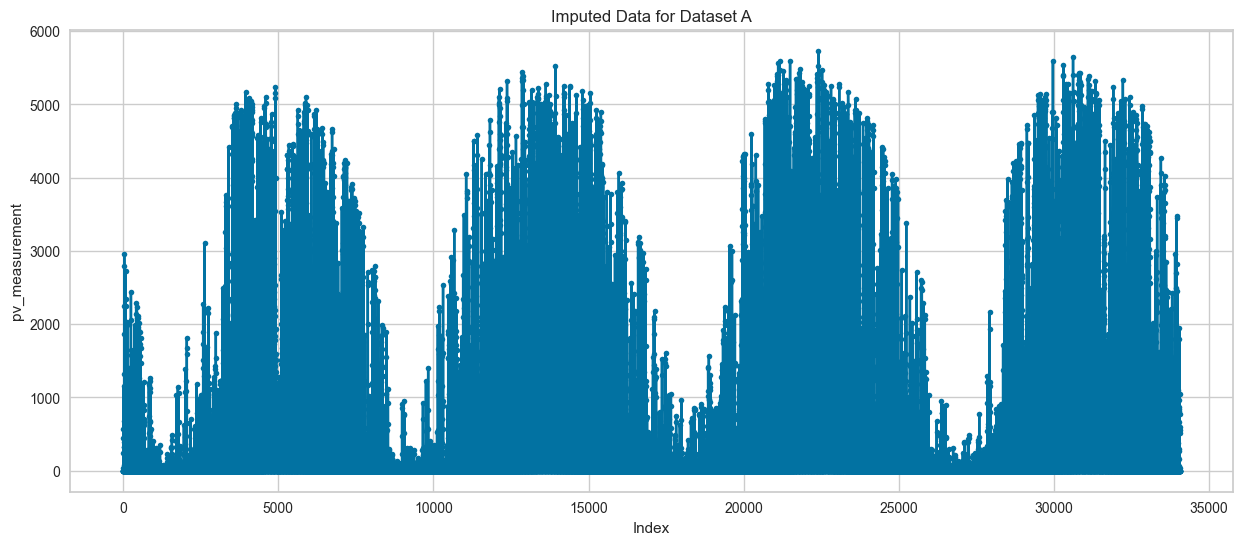

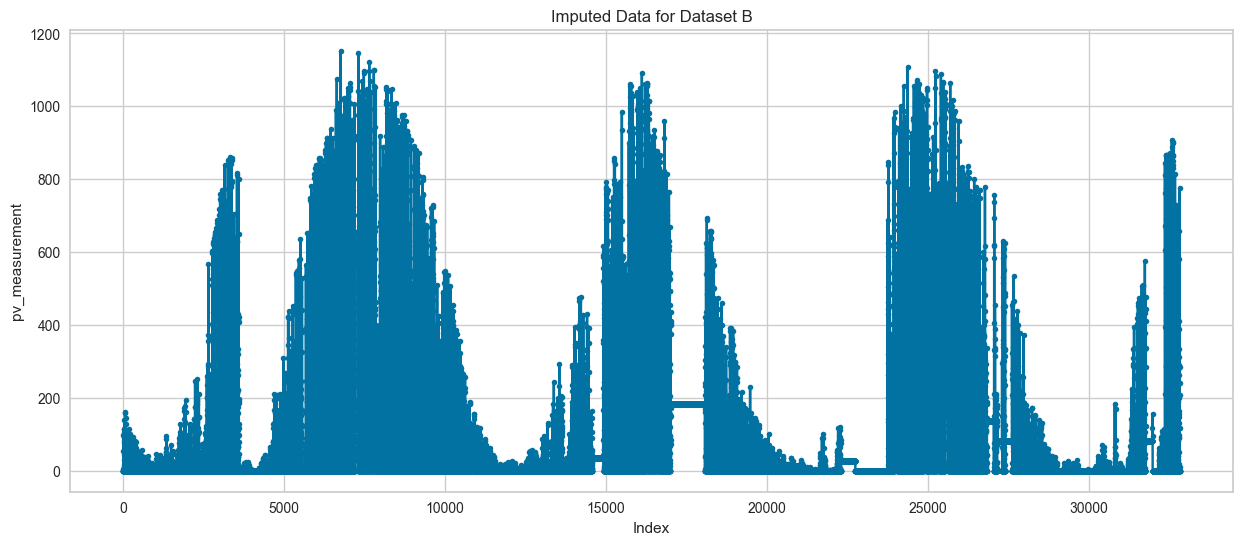

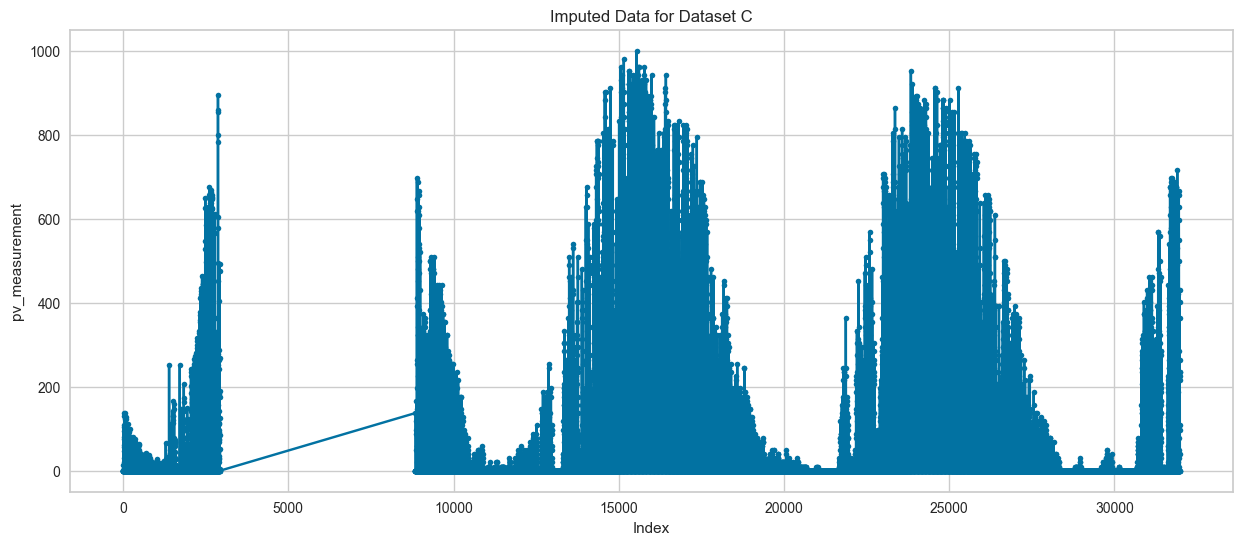

In [ ]:
def plot_data(data, title):
    plt.figure(figsize=(15, 6))
    plt.plot(data.index, data, marker='o', linestyle='-', markersize=4)
    plt.title(title)
    plt.xlabel('Index')
    plt.ylabel('pv_measurement')
    plt.show()

# Assuming you've already performed the imputation and updated the 'y' datasets:
# y = imputed_data_a['pv_measurement']
# y_b = imputed_data_b['pv_measurement']
# y_c = imputed_data_c['pv_measurement']

# Now, you can plot the new 'y' values
plot_data(y, title='Imputed Data for Dataset A')
plot_data(y_b, title='Imputed Data for Dataset B')
plot_data(y_c, title='Imputed Data for Dataset C')

In [ ]:
'''X_train_a, X_validation_a, y_train_a, y_validation_a = train_test_split(X, y, test_size=0.2, random_state=42)
X_train_b, X_validation_b, y_train_b, y_validation_b = train_test_split(X_b, y_b, test_size=0.2, random_state=42)
X_train_c, X_validation_c, y_train_c, y_validation_c = train_test_split(X_c, y_c, test_size=0.2, random_state=42)
'''

'X_train_a, X_validation_a, y_train_a, y_validation_a = train_test_split(X, y, test_size=0.2, random_state=42)\nX_train_b, X_validation_b, y_train_b, y_validation_b = train_test_split(X_b, y_b, test_size=0.2, random_state=42)\nX_train_c, X_validation_c, y_train_c, y_validation_c = train_test_split(X_c, y_c, test_size=0.2, random_state=42)\n'

In [ ]:
'''#H2o
import h2o
h2o.init()


# Kombiner X og y for treningsdata
train_a = pd.concat([X_train_a, y_train_a], axis=1)
train_b = pd.concat([X_train_b, y_train_b], axis=1)
train_c = pd.concat([X_train_c, y_train_c], axis=1)
# Kombiner X og y for valideringsdata
valid_a = pd.concat([X_validation_a, y_validation_a], axis=1)
valid_b = pd.concat([X_validation_b, y_validation_b], axis=1)
valid_c = pd.concat([X_validation_c, y_validation_c], axis=1)
# Konverter til H2OFrames
hf_train_a = h2o.H2OFrame(pd.DataFrame(train_a))
hf_train_b = h2o.H2OFrame(pd.DataFrame(train_b))
hf_train_c = h2o.H2OFrame(pd.DataFrame(train_c))
hf_valid_a = h2o.H2OFrame(pd.DataFrame(valid_a))
hf_valid_b = h2o.H2OFrame(pd.DataFrame(valid_b))
hf_valid_c = h2o.H2OFrame(pd.DataFrame(valid_c))
cat_features = ['dew','rime', 'is_day:idx', 'is_in_shadow:idx']
for feature in cat_features:
    hf_train_a[feature] = hf_train_a[feature].asfactor()
    hf_train_b[feature] = hf_train_b[feature].asfactor()
    hf_train_c[feature] = hf_train_c[feature].asfactor()
    hf_valid_a[feature] = hf_valid_a[feature].asfactor()
    hf_valid_b[feature] = hf_valid_b[feature].asfactor()
    hf_valid_c[feature] = hf_valid_c[feature].asfactor()

from h2o.automl import H2OAutoML

aml_a = H2OAutoML(max_models=20, seed=42, max_runtime_secs=3600)
aml_a.train(y='pv_measurement', training_frame=hf_train_a, validation_frame=hf_valid_a)

best_model_a = aml_a.leader


'''

"#H2o\nimport h2o\nh2o.init()\n\n\n# Kombiner X og y for treningsdata\ntrain_a = pd.concat([X_train_a, y_train_a], axis=1)\ntrain_b = pd.concat([X_train_b, y_train_b], axis=1)\ntrain_c = pd.concat([X_train_c, y_train_c], axis=1)\n# Kombiner X og y for valideringsdata\nvalid_a = pd.concat([X_validation_a, y_validation_a], axis=1)\nvalid_b = pd.concat([X_validation_b, y_validation_b], axis=1)\nvalid_c = pd.concat([X_validation_c, y_validation_c], axis=1)\n# Konverter til H2OFrames\nhf_train_a = h2o.H2OFrame(pd.DataFrame(train_a))\nhf_train_b = h2o.H2OFrame(pd.DataFrame(train_b))\nhf_train_c = h2o.H2OFrame(pd.DataFrame(train_c))\nhf_valid_a = h2o.H2OFrame(pd.DataFrame(valid_a))\nhf_valid_b = h2o.H2OFrame(pd.DataFrame(valid_b))\nhf_valid_c = h2o.H2OFrame(pd.DataFrame(valid_c))\ncat_features = ['dew','rime', 'is_day:idx', 'is_in_shadow:idx']\nfor feature in cat_features:\n    hf_train_a[feature] = hf_train_a[feature].asfactor()\n    hf_train_b[feature] = hf_train_b[feature].asfactor()\n    

In [ ]:
'''aml_b = H2OAutoML(max_models=20, seed=42, max_runtime_secs=3600)
aml_b.train(y='pv_measurement', training_frame=hf_train_b, validation_frame=hf_valid_b)

best_model_b = aml_b.leader
'''

"aml_b = H2OAutoML(max_models=20, seed=42, max_runtime_secs=3600)\naml_b.train(y='pv_measurement', training_frame=hf_train_b, validation_frame=hf_valid_b)\n\nbest_model_b = aml_b.leader\n"

In [ ]:
'''aml_c = H2OAutoML(max_models=20, seed=42, max_runtime_secs=3600)
aml_c.train(y='pv_measurement', training_frame=hf_train_c, validation_frame=hf_valid_c)

best_model_c = aml_c.leader
'''

"aml_c = H2OAutoML(max_models=20, seed=42, max_runtime_secs=3600)\naml_c.train(y='pv_measurement', training_frame=hf_train_c, validation_frame=hf_valid_c)\n\nbest_model_c = aml_c.leader\n"

In [ ]:
'''lb = aml.leaderboard
print(lb)'''


'lb = aml.leaderboard\nprint(lb)'

In [ ]:
import sys

# This will print the path to the Python executable that's running the current script
print(sys.executable)


c:\Users\thoma\anaconda3\envs\py38\python.exe


In [ ]:
#H20 detect
#managing the test data
'''X_test_a['location'] = 'A'
X_test_b['location'] = 'B'
X_test_c['location'] = 'C'''


features_to_convert = ['dew','rime', 'is_day:idx', 'is_in_shadow:idx']

# Convert features for X_test_a
for feature in features_to_convert:
    X_test_a[feature] = X_test_a[feature].apply(lambda x: int(x) if not pd.isna(x) else x)

# Convert features for X_test_b
for feature in features_to_convert:
    X_test_b[feature] = X_test_b[feature].apply(lambda x: int(x) if not pd.isna(x) else x)

# Convert features for X_test_c
for feature in features_to_convert:
    X_test_c[feature] = X_test_c[feature].apply(lambda x: int(x) if not pd.isna(x) else x)

nan_replacement = "missing_value"
cat_features = ['dew','rime', 'is_day:idx', 'is_in_shadow:idx']
# Replace NaN values in categorical features for X_test_a, X_test_b, and X_test_c
for feature in cat_features:
    X_test_a[feature].fillna(nan_replacement, inplace=True)
    X_test_b[feature].fillna(nan_replacement, inplace=True)
    X_test_c[feature].fillna(nan_replacement, inplace=True)


# Convert predictions to numpy arrays for reshaping
from pycaret.regression import load_model, predict_model
import pandas as pd

# Load the saved models
final_model_a = load_model('final_model_for_location_A')
final_model_b = load_model('final_model_for_location_B')
final_model_c = load_model('final_model_for_location_C')

# Assuming X_test_a, X_test_b, and X_test_c are your test datasets for locations A, B, and C
# Predict on new data
predictions_a = predict_model(final_model_a, data=pd.DataFrame(X_test_a))
predictions_b = predict_model(final_model_b, data=pd.DataFrame(X_test_b))
predictions_c = predict_model(final_model_c, data=pd.DataFrame(X_test_c))
print(predictions_a.head())
# The predictions are in the 'Label' column of the returned DataFrame
predicted_values_a = predictions_a['prediction_label']
predicted_values_b = predictions_b['prediction_label']
predicted_values_c = predictions_c['prediction_label']

# Now, predicted_values_a, predicted_values_b, and predicted_values_c contain the predicted values for your test datasets
# You can further analyze these predictions or use them in the context of your project

# If you want to see the performance of your models, you might need to create performance metrics based on the true values
# For example, if you have y_test_a, y_test_b, and y_test_c as the true values, you can calculate performance metrics like RMSE, MAE, etc.



'''X_test_a['snow_density:kgm3'].fillna(0.0, inplace=True)
X_test_b['snow_density:kgm3'].fillna(0.0, inplace=True)
X_test_c['snow_density:kgm3'].fillna(0.0, inplace=True)'''

'''h20_prediction_a = best_model_a.predict(h2o.H2OFrame(pd.DataFrame(X_test_a)))
h20_prediction_b = best_model_b.predict(h2o.H2OFrame(pd.DataFrame(X_test_b)))
h20_prediction_c = best_model_c.predict(h2o.H2OFrame(pd.DataFrame(X_test_c)))
lb_a = aml_a.leaderboard
lb_b = aml_a.leaderboard
lb_c = aml_a.leaderboard
print(lb_a.head(rows=lb_a.nrows))
print(lb_b.head(rows=lb_b.nrows))
print(lb_c.head(rows=lb_c.nrows))'''
'''cat_prediction_a = np.array(cat_prediction_a)
cat_prediction_b = np.array(cat_prediction_b)
cat_prediction_c = np.array(cat_prediction_c)'''
# Compute the mean of every 4 predictions




Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded


   absolute_humidity_2m:gm3  air_density_2m:kgm3  ceiling_height_agl:m  \
0                       4.4                1.286            912.700012   
1                       4.3                1.287            912.700012   
2                       4.3                1.287            912.700012   
3                       4.3                1.287            912.700012   
4                       4.3                1.287                   NaN   

   clear_sky_energy_1h:J  clear_sky_rad:W  cloud_base_agl:m  dew_point_2m:K  \
0                    0.0              0.0       1041.199951      271.700012   
1                    0.0              0.0       1054.800049      271.700012   
2                    0.0              0.0       1068.300049      271.600006   
3                    0.0              0.0       1081.900024      271.600006   
4                    0.0              0.0       1095.400024      271.600006   

   diffuse_rad:W  diffuse_rad_1h:J  direct_rad:W  direct_rad_1h:J  \
0          

'cat_prediction_a = np.array(cat_prediction_a)\ncat_prediction_b = np.array(cat_prediction_b)\ncat_prediction_c = np.array(cat_prediction_c)'

720
id                     int64
time          datetime64[ns]
prediction           float64
location              object
dtype: object


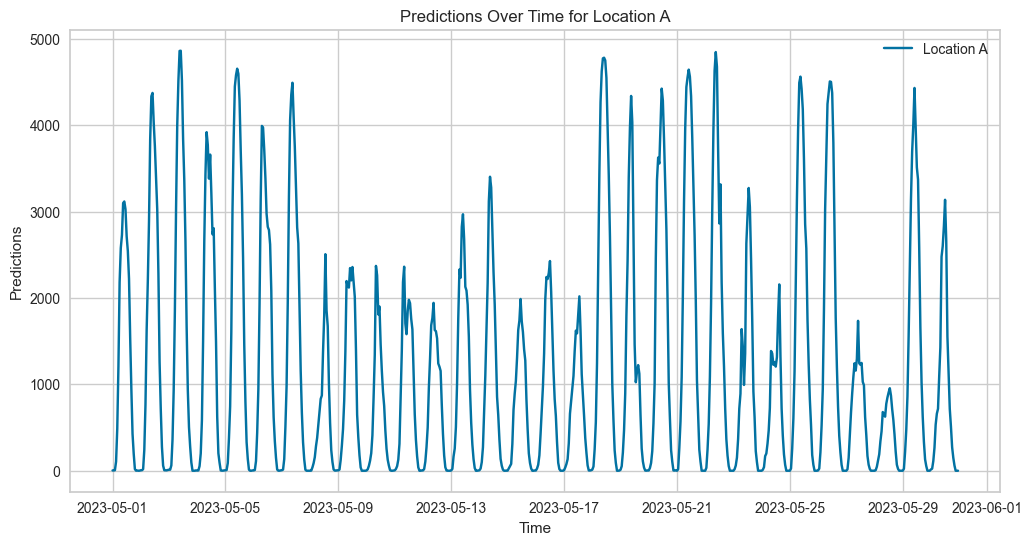

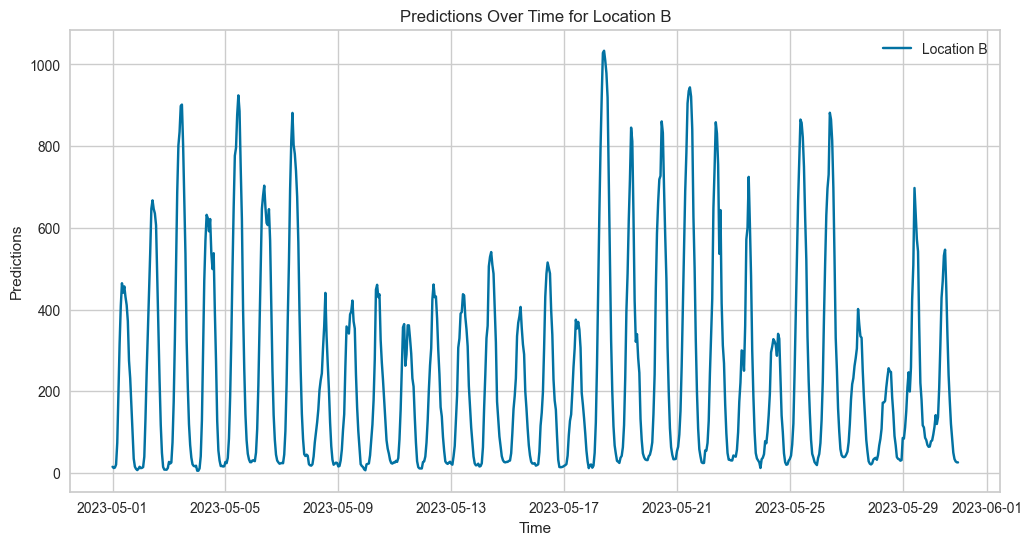

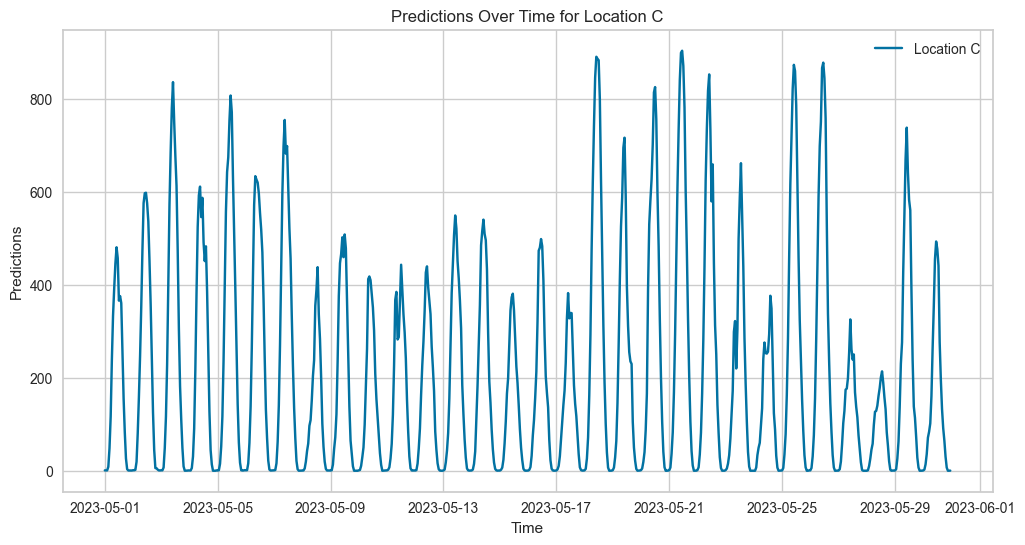

In [ ]:
# Convert H2OFrame to numpy array
cat_prediction_a_np = predicted_values_a.values.astype(float)
cat_prediction_b_np = predicted_values_b.values.astype(float)
cat_prediction_c_np = predicted_values_c.values.astype(float)

hourly_prediction_a_np = cat_prediction_a_np.reshape(-1, 4).mean(axis=1)
hourly_prediction_b_np = cat_prediction_b_np.reshape(-1, 4).mean(axis=1)
hourly_prediction_c_np = cat_prediction_c_np.reshape(-1, 4).mean(axis=1)

hourly_prediction_a_np = np.clip(hourly_prediction_a_np, 0, None)
hourly_prediction_b_np = np.clip(hourly_prediction_b_np, 0, None)
hourly_prediction_c_np = np.clip(hourly_prediction_c_np, 0, None)

num_predictions = len(hourly_prediction_a_np)
print(len(hourly_prediction_a_np))
timestamps = pd.date_range(start='2023-05-01 00:00:00', periods=num_predictions, freq='H')

# Step 1: Create individual DataFrames for each location
df_a = pd.DataFrame({
    'time': timestamps,
    'prediction': hourly_prediction_a_np,
    'location': 'A'
})

df_b = pd.DataFrame({
    'time': timestamps,
    'prediction': hourly_prediction_b_np,
    'location': 'B'
})

df_c = pd.DataFrame({
    'time': timestamps,
    'prediction': hourly_prediction_c_np,
    'location': 'C'
})

# Step 2: Concatenate these DataFrames
final_df = pd.concat([df_a, df_b, df_c], ignore_index=True)

# Step 3: Reset the index to get the 'id' column
final_df.reset_index(inplace=True)
final_df.rename(columns={'index': 'id'}, inplace=True)
print(final_df.dtypes)
# Now final_df is in the desired format
#print(final_df)
# Convert 'time' column to datetime if it's not already
final_df['time'] = pd.to_datetime(final_df['time'])

# Sort values by time for proper visualization
final_df.sort_values('time', inplace=True)

locations = final_df['location'].unique()

for loc in locations:
    # Filter data for each location
    temp_df = final_df[final_df['location'] == loc]
    
    plt.figure(figsize=(12, 6))  # Create a new figure for each location
    
    # Plotting
    plt.plot(temp_df['time'], temp_df['prediction'], label=f'Location {loc}')
    
    plt.xlabel('Time')
    plt.ylabel('Predictions')
    plt.title(f'Predictions Over Time for Location {loc}')
    plt.legend()
    plt.show()
# Now final_df is in the desired format
#print(final_df)
#print(final_df.columns)
final_df_save = final_df
#print(final_df.columns)
final_df= final_df.drop(columns=['time', 'location'])

#print(final_df)
sample_submission = sample_submission[['id']].merge(final_df[['id', 'prediction']], on='id', how='left')
sample_submission.to_csv('my_first_submission.csv', index=False)


In [ ]:
#H20 shutdown
#h2o.cluster().shutdown()

In [ ]:
'''df = X_combined
df['target'] = y_combined'''
# Create a scatter plot for each feature against the target
'''for feature in df.columns[:-1]:  # exclude the last column which is the target
    plt.figure(figsize=(10, 6))  # you can adjust the size as needed
    plt.scatter(df[feature], df['target'], color='blue')  # you can customize color, marker, etc.
    plt.title(f'Target vs {feature}')
    plt.xlabel(f'{feature}')
    plt.ylabel('Target')    
    plt.grid(True)
    plt.show()'''

"for feature in df.columns[:-1]:  # exclude the last column which is the target\n    plt.figure(figsize=(10, 6))  # you can adjust the size as needed\n    plt.scatter(df[feature], df['target'], color='blue')  # you can customize color, marker, etc.\n    plt.title(f'Target vs {feature}')\n    plt.xlabel(f'{feature}')\n    plt.ylabel('Target')    \n    plt.grid(True)\n    plt.show()"

In [ ]:
'''import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime, timedelta
from sklearn.preprocessing import MinMaxScaler
# Assuming x_combined is a list of lists where each inner list is a collection of feature values,
# and y_combined is a list of target values. Also, I'm assuming that x_combined and y_combined are aligned.

# Please replace 'feature1', 'feature2', ... with your actual feature names


# Define the starting point of your time series
start_time = datetime(2023, 1, 1, 0, 0)  # for example, starting from Jan 1, 2023, 00:00 AM

# Create a time column based on 15-minute intervals
df['time'] = [start_time + timedelta(minutes=15)*i for i in range(len(df))]

# Set time as the index
df.set_index('time', inplace=True)
scaler = MinMaxScaler()

# Scale the values of the features and the target. We need to fit the scaler to the entire dataset
# then transform each column separately to maintain the correct shape.
df_scaled = df#pd.DataFrame(scaler.fit_transform(df), columns=df.columns, index=df.index)

# Iterate over each feature for plotting
for feature in df.columns[:-1]:  # exclude the last column which is 'target'
    plt.figure(figsize=(15, 6))  # Adjust the size as you need
    
    # Plot feature
    plt.plot(df_scaled.index, df_scaled[feature], label=f'Feature: {feature}')
    
    # Plot target
    plt.plot(df_scaled.index, df_scaled['target'], label='Target', linewidth=2)  # Make target line a bit thicker

    plt.xlabel('Time')
    plt.ylabel('Scaled Value')
    plt.title(f'Scaled Feature {feature} and Target Values Over Time')
    plt.legend()  # To show legend
    plt.grid(True)
    plt.show()'''

"import matplotlib.pyplot as plt\nimport pandas as pd\nfrom datetime import datetime, timedelta\nfrom sklearn.preprocessing import MinMaxScaler\n# Assuming x_combined is a list of lists where each inner list is a collection of feature values,\n# and y_combined is a list of target values. Also, I'm assuming that x_combined and y_combined are aligned.\n\n# Please replace 'feature1', 'feature2', ... with your actual feature names\n\n\n# Define the starting point of your time series\nstart_time = datetime(2023, 1, 1, 0, 0)  # for example, starting from Jan 1, 2023, 00:00 AM\n\n# Create a time column based on 15-minute intervals\ndf['time'] = [start_time + timedelta(minutes=15)*i for i in range(len(df))]\n\n# Set time as the index\ndf.set_index('time', inplace=True)\nscaler = MinMaxScaler()\n\n# Scale the values of the features and the target. We need to fit the scaler to the entire dataset\n# then transform each column separately to maintain the correct shape.\ndf_scaled = df#pd.DataFrame(

In [ ]:

'''# Create a MinMaxScaler object
scaler = MinMaxScaler()

# We'll store the transformations in a new dataframe to avoid altering the original data.
df_transformed = df.copy()
# Before scaling, let's check for infinities or extremely large values
if np.any(np.isinf(df_transformed)) or np.any(df_transformed > np.finfo('float64').max):
    # Handle or remove infinities and very large numbers here
    print("Data contains infinite or NaN values. Handling them...")
    df_transformed.replace([np.inf, -np.inf], np.nan, inplace=True)  # replace infinities with NaN
    df_transformed.dropna(inplace=True)  # drop NaN values
# Applying log transformation, exponent, and square root while avoiding domain errors
# (e.g., log isn't defined for zero or negative numbers)

# Before performing transformations like log, ensure the values are within the valid domain
for feature in df.columns[:-1]:  # exclude the last column which is 'target'
    # Ensure the feature values are greater than 0 for log transformation
    if np.any(df[feature] <= 0):
        print(f"Cannot apply log transformation on {feature} because it contains zero or negative values.")
    else:
        df_transformed[f'{feature}_log'] = np.log(df[feature])

    # Apply exponential transformation (be cautious as this can create very large numbers)
    df_transformed[f'{feature}_exp'] = np.exp(df[feature])

    # Ensure the feature values are non-negative for square root transformation
    if np.any(df[feature] < 0):
        print(f"Cannot apply square root transformation on {feature} because it contains negative values.")
    else:
        df_transformed[f'{feature}_sqrt'] = np.sqrt(df[feature])
cap_value = np.finfo('float64').max / 10  # This avoids reaching the max value of float64
df_transformed = df_transformed.applymap(lambda x: min(cap_value, x))
# Now, you can proceed with scaling
try:
    df_transformed_scaled =df_transformed# pd.DataFrame(scaler.fit_transform(df_transformed), columns=df_transformed.columns, index=df.index)
except ValueError as e:
    print(f"An error occurred during scaling: {str(e)}")

# Iterate over each original feature for plotting
for feature in df.columns[:-1]:  # exclude the last column which is 'target'
    
    # List of transformations to be plotted
    transformations = ['original', 'log', 'exp', 'sqrt']
    
    for transform in transformations:
        if transform == 'original':
            transformed_feature = feature
            # Scaling the original feature since other transformations are also scaled
            current_feature_data = df[[feature, 'target']].copy()
            current_feature_data[feature] = scaler.fit_transform(current_feature_data[[feature]])
        else:
            transformed_feature = f'{feature}_{transform}'
        # Check if the transformed feature exists (it might not, due to domain errors)
        if transformed_feature in df_transformed_scaled.columns:
            plt.figure(figsize=(15, 6))  # Adjust the size as you need
            
            # Get the current feature and target as a DataFrame to calculate correlation
            current_feature_target_df = df_transformed_scaled[[transformed_feature, 'target']].dropna()  # dropna to ensure both feature and target have values
            
            # Calculate the correlation for the current transformed feature and target
            current_corr = current_feature_target_df.corr().iloc[0, 1]  # Gets the correlation value of the feature with the target

            # Plot transformed feature
            plt.plot(current_feature_target_df.index, current_feature_target_df[transformed_feature], label=f'Feature: {feature} ({transform})')
            
            # Plot target
            plt.plot(current_feature_target_df.index, current_feature_target_df['target'], label='Target', linewidth=2)  # Make target line a bit thicker
            
            plt.title(f'Scaled Feature {feature} ({transform}) and Target Values Over Time\nCorrelation with target: {current_corr:.2f}')
            
            plt.xlabel('Time')
            plt.ylabel('Scaled Value')
            plt.legend()  # To show legend
            plt.grid(True)
            plt.show()'''

'# Create a MinMaxScaler object\nscaler = MinMaxScaler()\n\n# We\'ll store the transformations in a new dataframe to avoid altering the original data.\ndf_transformed = df.copy()\n# Before scaling, let\'s check for infinities or extremely large values\nif np.any(np.isinf(df_transformed)) or np.any(df_transformed > np.finfo(\'float64\').max):\n    # Handle or remove infinities and very large numbers here\n    print("Data contains infinite or NaN values. Handling them...")\n    df_transformed.replace([np.inf, -np.inf], np.nan, inplace=True)  # replace infinities with NaN\n    df_transformed.dropna(inplace=True)  # drop NaN values\n# Applying log transformation, exponent, and square root while avoiding domain errors\n# (e.g., log isn\'t defined for zero or negative numbers)\n\n# Before performing transformations like log, ensure the values are within the valid domain\nfor feature in df.columns[:-1]:  # exclude the last column which is \'target\'\n    # Ensure the feature values are greate

In [ ]:
'''import itertools
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Assuming 'df' is your DataFrame and it's already been defined, along with your 'target' column.
# Define operations
def add(x, y):
    return x + y

def subtract(x, y):
    return x - y

def multiply(x, y):
    return x * y

def divide(x, y):
    return x / y

operations = {
    'add': add,
    'subtract': subtract,
    'multiply': multiply,
    'divide': divide,
}


scaler = StandardScaler()

# Let's create combinations of features
feature_combinations = list(itertools.combinations(df.columns[:-1], 2))  # 2 for pairs

# Initialize a dictionary to hold the correlation of each combination
combination_correlations = {}

# Go through all the combinations
for combo in feature_combinations:
    # Create a new feature that's the sum of the two current features
    df['combined_feature'] = df[list(combo)].sum(axis=1)  # summing the feature values
    
    # Scale the combined feature
    df['combined_feature_scaled'] = scaler.fit_transform(df[['combined_feature']])
    
    # Also, ensure the target is scaled
    if 'target_scaled' not in df:
        df['target_scaled'] = scaler.fit_transform(df[['target']])
    
    # Calculate the correlation with the target
    correlation = df[['combined_feature_scaled', 'target_scaled']].corr().iloc[0, 1]
    
    # Print the correlation for this combination
    print(f"Correlation for combination {combo}: {correlation:.2f}")
    
    # Add the correlation to our dictionary, using the feature names as the key
    combination_correlations[combo] = correlation
    
    # Remove the combined features to avoid confusion in the next iteration
    df.drop(['combined_feature', 'combined_feature_scaled'], axis=1, inplace=True)

# Now, you can check which combination has the highest correlation
best_combination = max(combination_correlations, key=combination_correlations.get)
best_corr = combination_correlations[best_combination]

print(f"\nThe combination of features {best_combination} has the highest correlation with the target: {best_corr:.2f}")
'''

'import itertools\nimport pandas as pd\nfrom sklearn.preprocessing import StandardScaler\n\n# Assuming \'df\' is your DataFrame and it\'s already been defined, along with your \'target\' column.\n# Define operations\ndef add(x, y):\n    return x + y\n\ndef subtract(x, y):\n    return x - y\n\ndef multiply(x, y):\n    return x * y\n\ndef divide(x, y):\n    return x / y\n\noperations = {\n    \'add\': add,\n    \'subtract\': subtract,\n    \'multiply\': multiply,\n    \'divide\': divide,\n}\n\n\nscaler = StandardScaler()\n\n# Let\'s create combinations of features\nfeature_combinations = list(itertools.combinations(df.columns[:-1], 2))  # 2 for pairs\n\n# Initialize a dictionary to hold the correlation of each combination\ncombination_correlations = {}\n\n# Go through all the combinations\nfor combo in feature_combinations:\n    # Create a new feature that\'s the sum of the two current features\n    df[\'combined_feature\'] = df[list(combo)].sum(axis=1)  # summing the feature values\n   

In [ ]:
'''import itertools
import pandas as pd
from sklearn.preprocessing import StandardScaler
import numpy as np

# ... [The same setup for the operations and the 'operations' dictionary as in the previous script] ...

import itertools
import pandas as pd
from sklearn.preprocessing import StandardScaler
import numpy as np

# ... [The same setup for the operations and the 'operations' dictionary as in the previous script] ...

scaler = StandardScaler()

# Define the target column
target_col = 'target'  # Change this to your actual target column name

# Create a list of columns excluding the target and target_scaled
columns_to_combine = [col for col in df.columns if col not in [target_col, 'target_scaled']]

feature_combinations = list(itertools.combinations(columns_to_combine, 2))

# Dictionary to hold the best combinations for each feature
best_combination_boosts = {feature: {'combination': None, 'boost': None} for feature in columns_to_combine}

# Ensure the target is scaled (if not already done)
if 'target_scaled' not in df:
    df['target_scaled'] = scaler.fit_transform(df[[target_col]])

# Individual feature correlations
individual_correlations = {}
for feature in columns_to_combine:
    individual_correlations[feature] = df[[feature, 'target_scaled']].corr().iloc[0, 1]

for combo in feature_combinations:
    for op_name, op_func in operations.items():
        # Avoid division by zero and check for infinity
        if op_name == 'divide' and (df[combo[1]] == 0).any():
            continue

        combined_feature = op_func(df[combo[0]], df[combo[1]])

        if np.isinf(combined_feature).any():
            continue

        df['combined_feature'] = combined_feature

        # Scale the combined feature
        df['combined_feature_scaled'] = scaler.fit_transform(df[['combined_feature']])

        correlation = df[['combined_feature_scaled', 'target_scaled']].corr().iloc[0, 1]

        # Calculate the boost in correlation
        sum_individual_correlations = abs(individual_correlations[combo[0]]) + abs(individual_correlations[combo[1]])
        boost_in_correlation = abs(correlation) - abs(sum_individual_correlations)

        # Create a key for the operation and features
        key = (combo[0], combo[1], op_name)

        # Check if this combination gives the best boost so far for each feature in the combination
        for feature in combo:
            if best_combination_boosts[feature]['boost'] is None or boost_in_correlation > best_combination_boosts[feature]['boost']:
                best_combination_boosts[feature]['combination'] = key
                best_combination_boosts[feature]['boost'] = boost_in_correlation

        df.drop(['combined_feature', 'combined_feature_scaled'], axis=1, inplace=True)

# Display the results for each feature
for feature, data in best_combination_boosts.items():
    print(f"Feature: {feature}")
    if data['combination'] is not None:
        print(f"  Best Combination: {data['combination']}, Boost in Correlation: {data['boost']:.2f}")
    else:
        print("  No valid combination found.")
    print()

'''





'import itertools\nimport pandas as pd\nfrom sklearn.preprocessing import StandardScaler\nimport numpy as np\n\n# ... [The same setup for the operations and the \'operations\' dictionary as in the previous script] ...\n\nimport itertools\nimport pandas as pd\nfrom sklearn.preprocessing import StandardScaler\nimport numpy as np\n\n# ... [The same setup for the operations and the \'operations\' dictionary as in the previous script] ...\n\nscaler = StandardScaler()\n\n# Define the target column\ntarget_col = \'target\'  # Change this to your actual target column name\n\n# Create a list of columns excluding the target and target_scaled\ncolumns_to_combine = [col for col in df.columns if col not in [target_col, \'target_scaled\']]\n\nfeature_combinations = list(itertools.combinations(columns_to_combine, 2))\n\n# Dictionary to hold the best combinations for each feature\nbest_combination_boosts = {feature: {\'combination\': None, \'boost\': None} for feature in columns_to_combine}\n\n# Ensur

In [ ]:
'''import itertools
import pandas as pd
from sklearn.preprocessing import StandardScaler
import numpy as np

# Define your operations
def add(x1, x2):
    return x1 + x2

def subtract(x1, x2):
    return x1 - x2

def multiply(x1, x2):
    return x1 * x2

def divide(x1, x2):
    # Prevent division by zero
    if (x2 == 0).any():
        return x1
    else:
        return x1 / x2

operations = {
    'add': add,
    'subtract': subtract,
    'multiply': multiply,
    'divide': divide
}

scaler = StandardScaler()

# Assume 'df' is your DataFrame and 'target' is the name of your target column
target_col = 'target'

# Create a list of columns, excluding the target
columns_to_combine = [col for col in df.columns if col != target_col]

feature_combinations = list(itertools.combinations(columns_to_combine, 2))

best_combination_boosts = {feature: {'combination': None, 'boost': -np.inf} for feature in columns_to_combine}

# Scale target if not already done
if target_col + '_scaled' not in df:
    df[target_col + '_scaled'] = scaler.fit_transform(df[[target_col]])

# Individual feature correlations
individual_correlations = df[columns_to_combine + [target_col + '_scaled']].corr()[target_col + '_scaled'][:-1]

for combo in feature_combinations:
    for op_name, op_func in operations.items():
        combined_feature = op_func(df[combo[0]], df[combo[1]])

        # Skip if there are any infinities
        if np.isinf(combined_feature).any():
            continue

        df['combined_feature'] = combined_feature

        # Scale the combined feature
        df['combined_feature_scaled'] = scaler.fit_transform(df[['combined_feature']])

        combined_corr = df[['combined_feature_scaled', target_col + '_scaled']].corr().iloc[0, 1]

        if np.isnan(combined_corr) or abs(combined_corr) <= 0.01:  # Skip if correlation is NaN or close to zero
            continue

        # Calculate the boost in correlation, ensuring it's higher than any of the individual correlations
        boost_in_correlation = abs(combined_corr) - max(abs(individual_correlations[combo[0]]), abs(individual_correlations[combo[1]]))

        if boost_in_correlation > 0:  # Only consider it if there's an actual improvement
            for feature in combo:
                if boost_in_correlation > best_combination_boosts[feature]['boost']:
                    best_combination_boosts[feature]['combination'] = (combo[0], combo[1], op_name)
                    best_combination_boosts[feature]['boost'] = boost_in_correlation

        df.drop(['combined_feature', 'combined_feature_scaled'], axis=1, inplace=True)

# Display the results for each feature
for feature, data in best_combination_boosts.items():
    print(f"Feature: {feature}")
    if data['combination'] is not None and data['boost'] > 0:
        print(f"  Best Combination: {data['combination']}, Boost in Correlation: {data['boost']:.2f}")
    else:
        print("  No valid combination found.")
    print()'''


'import itertools\nimport pandas as pd\nfrom sklearn.preprocessing import StandardScaler\nimport numpy as np\n\n# Define your operations\ndef add(x1, x2):\n    return x1 + x2\n\ndef subtract(x1, x2):\n    return x1 - x2\n\ndef multiply(x1, x2):\n    return x1 * x2\n\ndef divide(x1, x2):\n    # Prevent division by zero\n    if (x2 == 0).any():\n        return x1\n    else:\n        return x1 / x2\n\noperations = {\n    \'add\': add,\n    \'subtract\': subtract,\n    \'multiply\': multiply,\n    \'divide\': divide\n}\n\nscaler = StandardScaler()\n\n# Assume \'df\' is your DataFrame and \'target\' is the name of your target column\ntarget_col = \'target\'\n\n# Create a list of columns, excluding the target\ncolumns_to_combine = [col for col in df.columns if col != target_col]\n\nfeature_combinations = list(itertools.combinations(columns_to_combine, 2))\n\nbest_combination_boosts = {feature: {\'combination\': None, \'boost\': -np.inf} for feature in columns_to_combine}\n\n# Scale target if

In [ ]:
'''import itertools
import pandas as pd
from sklearn.preprocessing import StandardScaler
import numpy as np

def add(x, y):
    return x + y

def subtract(x, y):
    return x - y

def multiply(x, y):
    return x * y

def divide(x, y):
    return x / y

operations = {
    'add': add,
    'subtract': subtract,
    'multiply': multiply,
    'divide': divide,
}

import itertools
import pandas as pd
from sklearn.preprocessing import StandardScaler
import numpy as np

# ... [The same setup for the operations and the 'operations' dictionary as in the previous script] ...

scaler = StandardScaler()

# Define the target column
target_col = 'target'  # Change this to your actual target column name

# Create a list of columns excluding the target and target_scaled
columns_to_combine = [col for col in df.columns if col not in [target_col, 'target_scaled']]

feature_combinations = list(itertools.combinations(columns_to_combine, 2))

# Dictionary to hold the best combinations for each feature
best_combinations_per_feature = {feature: [] for feature in columns_to_combine}

for combo in feature_combinations:
    for op_name, op_func in operations.items():
        # Avoid division by zero and check for infinity
        if op_name == 'divide' and (df[combo[1]] == 0).any():
            continue

        combined_feature = op_func(df[combo[0]], df[combo[1]])

        if np.isinf(combined_feature).any():
            continue

        df['combined_feature'] = combined_feature

        # Scale the combined feature
        df['combined_feature_scaled'] = scaler.fit_transform(df[['combined_feature']])
        
        # Ensure the target is scaled (if not already done)
        if 'target_scaled' not in df:
            df['target_scaled'] = scaler.fit_transform(df[[target_col]])

        correlation = df[['combined_feature_scaled', 'target_scaled']].corr().iloc[0, 1]

        # Create a key for the operation and features
        key = (combo[0], combo[1], op_name)

        # Add the result to the list for each feature involved in this combination
        for feature in combo:
            best_combinations_per_feature[feature].append((key, correlation))

        df.drop(['combined_feature', 'combined_feature_scaled'], axis=1, inplace=True)

# Process the results to keep only the top 2 combinations for each feature
for feature, combinations in best_combinations_per_feature.items():
    # Sort combinations by absolute value of correlation and keep the top 2
    top_combinations = sorted(combinations, key=lambda x: abs(x[1]), reverse=True)[:2]
    best_combinations_per_feature[feature] = top_combinations

# Display the results
for feature, combinations in best_combinations_per_feature.items():
    print(f"Feature: {feature}")
    for combo in combinations:
        print(f"  Combination: {combo[0]}, Correlation: {combo[1]:.2f}")
    print()'''


'import itertools\nimport pandas as pd\nfrom sklearn.preprocessing import StandardScaler\nimport numpy as np\n\ndef add(x, y):\n    return x + y\n\ndef subtract(x, y):\n    return x - y\n\ndef multiply(x, y):\n    return x * y\n\ndef divide(x, y):\n    return x / y\n\noperations = {\n    \'add\': add,\n    \'subtract\': subtract,\n    \'multiply\': multiply,\n    \'divide\': divide,\n}\n\nimport itertools\nimport pandas as pd\nfrom sklearn.preprocessing import StandardScaler\nimport numpy as np\n\n# ... [The same setup for the operations and the \'operations\' dictionary as in the previous script] ...\n\nscaler = StandardScaler()\n\n# Define the target column\ntarget_col = \'target\'  # Change this to your actual target column name\n\n# Create a list of columns excluding the target and target_scaled\ncolumns_to_combine = [col for col in df.columns if col not in [target_col, \'target_scaled\']]\n\nfeature_combinations = list(itertools.combinations(columns_to_combine, 2))\n\n# Dictionary

In [ ]:
'''from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Assume df is your DataFrame and it includes your features and target variable

# We will first separate out the features and the target variable
# Assuming the target variable is the last column in the dataframe
X = df.iloc[:, :-1].values  # features
y = df.iloc[:, -1].values  # target
# Remove rows with missing values
nan_indices = np.where(np.isnan(X).any(axis=1))[0]

# Delete these rows from X and y
X = np.delete(X, nan_indices, axis=0)
y = np.delete(y, nan_indices, axis=0)
# Standardizing the features (important for PCA)
X = StandardScaler().fit_transform(X)

# PCA projection
pca = PCA()  # You can specify the number of components, or leave it blank to keep all components
principalComponents = pca.fit_transform(X)

# Convert to DataFrame
principalDf = pd.DataFrame(data=principalComponents)

# The following code can be used to visualize explained variance from PCA components 
# to decide on the number of components to keep

explained_variance = pca.explained_variance_ratio_
plt.figure(figsize=(6, 4))
plt.bar(range(len(explained_variance)), explained_variance, alpha=0.5, align='center', label='individual explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

# Now, you can calculate the correlation between the principal components and the target
correlations = {}
for i in range(principalDf.shape[1]):
    correlations[f'PC{i+1}'] = np.corrcoef(principalDf[i], y)[0, 1]

# Print the correlations
print("Correlations of principal components with the target:")
for comp, corr in correlations.items():
    print(f"{comp}: {corr:.2f}")


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Select the number of components, e.g., the first five
n_components = 19
X_selected = principalDf.iloc[:, :n_components]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Fit the model
model.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = model.predict(X_test)

# The coefficients
print('Coefficients: \n', model.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test, y_pred))

# Plot outputs (if your target is continuous and this plot makes sense)
plt.scatter(X_test.iloc[:, 0], y_test,  color='black')  # change index for different PC
plt.plot(X_test.iloc[:, 0], y_pred, color='blue', linewidth=3)

plt.xlabel('First Principal Component')
plt.ylabel('Target')
plt.title('Regression Model Results')

plt.show()
'''

'from sklearn.decomposition import PCA\nfrom sklearn.preprocessing import StandardScaler\nimport matplotlib.pyplot as plt\nimport pandas as pd\nimport numpy as np\n\n# Assume df is your DataFrame and it includes your features and target variable\n\n# We will first separate out the features and the target variable\n# Assuming the target variable is the last column in the dataframe\nX = df.iloc[:, :-1].values  # features\ny = df.iloc[:, -1].values  # target\n# Remove rows with missing values\nnan_indices = np.where(np.isnan(X).any(axis=1))[0]\n\n# Delete these rows from X and y\nX = np.delete(X, nan_indices, axis=0)\ny = np.delete(y, nan_indices, axis=0)\n# Standardizing the features (important for PCA)\nX = StandardScaler().fit_transform(X)\n\n# PCA projection\npca = PCA()  # You can specify the number of components, or leave it blank to keep all components\nprincipalComponents = pca.fit_transform(X)\n\n# Convert to DataFrame\nprincipalDf = pd.DataFrame(data=principalComponents)\n\n# Th

In [ ]:
#1 model instead of 3

#adding location to cat_features
#cat_features = ['is_day:idx','is_in_shadow:idx']
'''cat_model_combined = CatBoostRegressor(
    n_estimators=2000,
    thread_count=-1,
    max_depth=4,
    loss_function='RMSE',
    random_seed=42,
    od_type="Iter",
    early_stopping_rounds=10,
    logging_level='Verbose',
    #cat_features=cat_features
)
cat_model_a = CatBoostRegressor(
    n_estimators=2000,
    thread_count=-1,
    max_depth=4,
    loss_function='RMSE',
    random_seed=42,
    od_type="Iter",
    early_stopping_rounds=10,
    logging_level='Verbose',
    #cat_features=cat_features
)
cat_model_b_c = CatBoostRegressor(
    n_estimators=2000,
    thread_count=-1,
    max_depth=4,
    loss_function='RMSE',
    random_seed=42,
    od_type="Iter",
    early_stopping_rounds=10,
    logging_level='Verbose',
    #cat_features=cat_features
)
cat_model_b = CatBoostRegressor(
    n_estimators=2000,
    thread_count=-1,
    max_depth=4,
    loss_function='RMSE',
    random_seed=42,
    od_type="Iter",
    early_stopping_rounds=10,
    logging_level='Verbose',
    #cat_features=cat_features
)
cat_model_c = CatBoostRegressor(
    n_estimators=2000,
    thread_count=-1,
    max_depth=4,
    loss_function='RMSE',
    random_seed=42,
    od_type="Iter",
    early_stopping_rounds=10,
    logging_level='Verbose',
    #cat_features=cat_features
)

# Train the model with the specified feature types
#cat_model_combined.fit(X_train_combined, y_train_combined,  eval_set=(X_validation_combined, y_validation_combined))
cat_model_a.fit(X_train_a, y_train_a,  eval_set=(X_validation_a, y_validation_a)) #'''cat_features=cat_features,'''
cat_model_b.fit(X_train_b, y_train_b,  eval_set=(X_validation_b, y_validation_b))
cat_model_c.fit(X_train_c, y_train_c,  eval_set=(X_validation_c, y_validation_c))'''
#cat_model_b_c.fit(X_train_b_c, y_train_b_c,  eval_set=(X_validation_b_c, y_validation_b_c))
# Assuming you have a trained CatBoost model named 'cat_model_combined'
'''feature_importances = cat_model_combined.get_feature_importance()

# If you also want to display feature names, you need to make sure that your dataset has feature names.
feature_names = X_combined.columns.tolist() # Assuming your training set is a pandas dataframe

# Combine feature names and their importances into a dictionary, and print it
feature_importance_dict = dict(zip(feature_names, feature_importances))

# Alternatively, you can create a dataframe for better visualization
import pandas as pd

feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
#print(feature_importance_df)'''
'''from sklearn.preprocessing import LabelEncoder
for feature in cat_features:
    lbl_encoder = LabelEncoder()
    X_combined[feature] = lbl_encoder.fit_transform(X_combined[feature].astype(str))
'''
'''from sklearn.feature_selection import RFECV
selector = RFECV(estimator=cat_model_combined, step=1, cv=5)
selector = selector.fit(X_combined, y_combined)
print(f"Optimal number of features : {selector.n_features_}")'''



SyntaxError: invalid syntax (737095355.py, line 63)

In [ ]:
'''# Retrieve important information from the selector
feature_names = list(X_combined.columns)
feature_rankings = selector.ranking_  # array with ranks of features
n_features_optimal = selector.n_features_  # optimal number of features

# Check if cv_results_ attribute exists (for newer versions of scikit-learn)
if hasattr(selector, 'cv_results_'):
    grid_scores = selector.cv_results_['mean_test_score']
else:
    grid_scores = selector.grid_scores_  # for older versions of scikit-learn

# Filter the names of the selected features
selected_features = [feature for rank, feature in zip(feature_rankings, feature_names) if rank == 1]

# Create a report string
report = []
report.append(f"Optimal number of features: {n_features_optimal}\n")
report.append("Selected features:\n")
report.extend([f"\t- {feature}\n" for feature in selected_features])
report.append("\nFeature rankings (1 is best):\n")
report.extend([f"\t- {feature}: {rank}\n" for feature, rank in zip(feature_names, feature_rankings)])
report.append("\nCV scores for each feature set size:\n")
report.extend([f"\t- {i+1} features: {score}\n" for i, score in enumerate(grid_scores)])

report_str = ''.join(report)

# Print the report
print(report_str)

# Save the report to a text file
with open('feature_selection_report.txt', 'w') as file:
    file.write(report_str)
'''

'# Retrieve important information from the selector\nfeature_names = list(X_combined.columns)\nfeature_rankings = selector.ranking_  # array with ranks of features\nn_features_optimal = selector.n_features_  # optimal number of features\n\n# Check if cv_results_ attribute exists (for newer versions of scikit-learn)\nif hasattr(selector, \'cv_results_\'):\n    grid_scores = selector.cv_results_[\'mean_test_score\']\nelse:\n    grid_scores = selector.grid_scores_  # for older versions of scikit-learn\n\n# Filter the names of the selected features\nselected_features = [feature for rank, feature in zip(feature_rankings, feature_names) if rank == 1]\n\n# Create a report string\nreport = []\nreport.append(f"Optimal number of features: {n_features_optimal}\n")\nreport.append("Selected features:\n")\nreport.extend([f"\t- {feature}\n" for feature in selected_features])\nreport.append("\nFeature rankings (1 is best):\n")\nreport.extend([f"\t- {feature}: {rank}\n" for feature, rank in zip(feature

In [ ]:

'''print(X_test_a.dtypes)
print("a")
features_to_convert = ['is_day:idx','is_in_shadow:idx']

# Convert features for X_test_a
for feature in features_to_convert:
    X_test_a[feature] = X_test_a[feature].apply(lambda x: int(x) if not pd.isna(x) else x)

# Convert features for X_test_b
for feature in features_to_convert:
    X_test_b[feature] = X_test_b[feature].apply(lambda x: int(x) if not pd.isna(x) else x)

# Convert features for X_test_c
for feature in features_to_convert:
    X_test_c[feature] = X_test_c[feature].apply(lambda x: int(x) if not pd.isna(x) else x)

nan_replacement = "missing_value"

# Replace NaN values in categorical features for X_test_a, X_test_b, and X_test_c
for feature in cat_features:
    X_test_a[feature].fillna(nan_replacement, inplace=True)
    X_test_b[feature].fillna(nan_replacement, inplace=True)
    X_test_c[feature].fillna(nan_replacement, inplace=True)'''


'print(X_test_a.dtypes)\nprint("a")\nfeatures_to_convert = [\'is_day:idx\',\'is_in_shadow:idx\']\n\n# Convert features for X_test_a\nfor feature in features_to_convert:\n    X_test_a[feature] = X_test_a[feature].apply(lambda x: int(x) if not pd.isna(x) else x)\n\n# Convert features for X_test_b\nfor feature in features_to_convert:\n    X_test_b[feature] = X_test_b[feature].apply(lambda x: int(x) if not pd.isna(x) else x)\n\n# Convert features for X_test_c\nfor feature in features_to_convert:\n    X_test_c[feature] = X_test_c[feature].apply(lambda x: int(x) if not pd.isna(x) else x)\n\nnan_replacement = "missing_value"\n\n# Replace NaN values in categorical features for X_test_a, X_test_b, and X_test_c\nfor feature in cat_features:\n    X_test_a[feature].fillna(nan_replacement, inplace=True)\n    X_test_b[feature].fillna(nan_replacement, inplace=True)\n    X_test_c[feature].fillna(nan_replacement, inplace=True)'

In [ ]:
'''#1 model predictions, catboost

#cat_features = ['dew_or_rime:idx', 'is_day:idx', 'is_in_shadow:idx']
# Convert predictions to numpy arrays for reshaping
cat_prediction_a = np.array(cat_model_a.predict(X_test_a))
cat_prediction_b = np.array(cat_model_b.predict(X_test_b))
cat_prediction_c = np.array(cat_model_c.predict(X_test_c))


# Rescale predictions
rescaled_prediction_a = cat_prediction_a * mean_a
rescaled_prediction_b = cat_prediction_b * mean_b
rescaled_prediction_c = cat_prediction_c * mean_c

# Compute the mean of every 4 predictions
hourly_prediction_a = cat_prediction_a.reshape(-1, 4).mean(axis=1)
hourly_prediction_b = cat_prediction_b.reshape(-1, 4).mean(axis=1)
hourly_prediction_c = cat_prediction_c.reshape(-1, 4).mean(axis=1)

hourly_prediction_a = np.clip(hourly_prediction_a, 0, None)
hourly_prediction_b = np.clip(hourly_prediction_b, 0, None)
hourly_prediction_c = np.clip(hourly_prediction_c, 0, None)


hourly_prediction_a = inverse_yeojohnson(hourly_prediction_a, lambda_found)
hourly_prediction_b = inverse_yeojohnson(hourly_prediction_b, lambda_found)
hourly_prediction_c = inverse_yeojohnson(hourly_prediction_c, lambda_found)
num_predictions = len(hourly_prediction_a)
print(len(hourly_prediction_a))
num_predictions = len(hourly_prediction_c)
timestamps = pd.date_range(start='2023-05-01 00:00:00', periods=num_predictions, freq='H')

# Step 1: Create individual DataFrames for each location
df_a = pd.DataFrame({
    'time': timestamps,
    'prediction': hourly_prediction_a,
    'location': 'A'
})

df_b = pd.DataFrame({
    'time': timestamps,
    'prediction': hourly_prediction_b,
    'location': 'B'
})

df_c = pd.DataFrame({
    'time': timestamps,
    'prediction': hourly_prediction_c,
    'location': 'C'
})

# Step 2: Concatenate these DataFrames
final_df = pd.concat([df_a, df_b, df_c], ignore_index=True)

# Step 3: Reset the index to get the 'id' column
final_df.reset_index(inplace=True)
final_df.rename(columns={'index': 'id'}, inplace=True)
# Convert 'time' column to datetime if it's not already
final_df['time'] = pd.to_datetime(final_df['time'])

# Sort values by time for proper visualization
final_df.sort_values('time', inplace=True)

locations = final_df['location'].unique()

for loc in locations:
    # Filter data for each location
    temp_df = final_df[final_df['location'] == loc]
    
    plt.figure(figsize=(12, 6))  # Create a new figure for each location
    
    # Plotting
    plt.plot(temp_df['time'], temp_df['prediction'], label=f'Location {loc}')
    
    plt.xlabel('Time')
    plt.ylabel('Predictions')
    plt.title(f'Predictions Over Time for Location {loc}')
    plt.legend()
    plt.show()
# Now final_df is in the desired format
#print(final_df)
#print(final_df.columns)
final_df_save = final_df
final_df= final_df.drop(columns=['time', 'location'])

#print(final_df)
sample_submission = sample_submission[['id']].merge(final_df[['id', 'prediction']], on='id', how='left')
sample_submission.to_csv('my_first_submission.csv', index=False)
print(final_df_save.dtypes)'''

"#1 model predictions, catboost\n\n#cat_features = ['dew_or_rime:idx', 'is_day:idx', 'is_in_shadow:idx']\n# Convert predictions to numpy arrays for reshaping\ncat_prediction_a = np.array(cat_model_a.predict(X_test_a))\ncat_prediction_b = np.array(cat_model_b.predict(X_test_b))\ncat_prediction_c = np.array(cat_model_c.predict(X_test_c))\n\n\n# Rescale predictions\nrescaled_prediction_a = cat_prediction_a * mean_a\nrescaled_prediction_b = cat_prediction_b * mean_b\nrescaled_prediction_c = cat_prediction_c * mean_c\n\n# Compute the mean of every 4 predictions\nhourly_prediction_a = cat_prediction_a.reshape(-1, 4).mean(axis=1)\nhourly_prediction_b = cat_prediction_b.reshape(-1, 4).mean(axis=1)\nhourly_prediction_c = cat_prediction_c.reshape(-1, 4).mean(axis=1)\n\nhourly_prediction_a = np.clip(hourly_prediction_a, 0, None)\nhourly_prediction_b = np.clip(hourly_prediction_b, 0, None)\nhourly_prediction_c = np.clip(hourly_prediction_c, 0, None)\n\n\nhourly_prediction_a = inverse_yeojohnson(ho

In [ ]:
'''import os
import pandas as pd  # assuming you're using pandas for your data manipulation

# Function to get the next run_id
def get_next_run_id():
    counter_file = 'run_counter.txt'

    if not os.path.exists(counter_file):
        with open(counter_file, 'w') as file:
            file.write('1')
            return 'run1'

    with open(counter_file, 'r') as file:
        current_count = int(file.read())

    new_run_id = f"run{current_count}"

    with open(counter_file, 'w') as file:
        file.write(str(current_count + 1))

    return new_run_id

# Get the next run_id
run_id = get_next_run_id()

# Your code that generates final_df_save goes here

# Save the predictions to a CSV, including the run_id in the filename
final_df_save.to_csv(f'predictions_{run_id}.csv')'''


In [ ]:
'''import pandas as pd
import matplotlib.pyplot as plt
import os
import re

# Directory where the prediction files are saved
pred_dir = os.getcwd()

regex = re.compile(r'predictions_run\d+.*\.csv$')

# List all prediction CSV files in the directory that match the pattern
pred_files = [f for f in os.listdir(pred_dir) if regex.match(f)]

# Create a dictionary of dataframes, each containing data from the prediction files
dfs = {}
for file in pred_files:
    # The key will be the filename without extension, you can customize this part as needed
    key = file.replace('.csv', '')  
    dfs[key] = pd.read_csv(os.path.join(pred_dir, file))

# Assuming all prediction files have the same locations and times
locations = dfs[list(dfs.keys())[0]]['location'].unique()

for loc in locations:
    plt.figure(figsize=(12, 6))
    
    # Plot each dataframe on the same plot
    for run_id, df in dfs.items():
        temp_df = df[df['location'] == loc]
        plt.plot(temp_df['time'], temp_df['prediction'], label=f'{run_id} for Location {loc}')
    
    plt.xlabel('Time')
    plt.ylabel('Predictions')
    plt.title(f'Predictions Over Time for Location {loc}')
    plt.legend()
    
    # Save the comparison figure
    plt.savefig(f'Location_{loc}_comparisons.png')
    plt.close()  # Close the figure to free up memory
'''